# Homework 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import rcmod
from yellowbrick.style.colors import resolve_colors
import warnings
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Problem 1

In [2]:
data_p1_path = "data/p1/X.npy"
target_p1_path = "data/p1/y.npy"
X = np.load(data_p1_path)
y = np.load(target_p1_path)
X.shape

(511, 45768)

In [3]:
np.max(X[:,0])

11.941397591320595

In [4]:
np.min(X[:,0])

0.0

In [5]:
np.mean(X[:,0])

0.054671956357725884

In [6]:
pd.DataFrame(X).head()

0      1           2           3         4          5          6      \
0    0.0    0.0  133.855304  164.894216  0.000000  24.249149   3.879864   
1    0.0    0.0   60.255141   97.772493  3.410668   0.000000   1.136889   
2    0.0    0.0  129.614628  149.288277  0.000000  19.673649   0.000000   
3    0.0    0.0  100.392193  117.439923  0.000000  45.460615   0.000000   
4    0.0    0.0   78.890168  191.926828  0.000000  10.597187  12.952117   

   7          8           9      ...  45758  45759  45760  45761  45762  \
0    0.0  93.116733   64.017754  ...    0.0    0.0    0.0    0.0    0.0   
1    0.0  28.422236   36.380462  ...    0.0    0.0    0.0    0.0    0.0   
2    0.0  20.830922   79.851869  ...    0.0    0.0    0.0    0.0    0.0   
3    0.0   0.000000  161.006346  ...    0.0    0.0    0.0    0.0    0.0   
4    0.0  43.566212   25.904234  ...    0.0    0.0    0.0    0.0    0.0   

   45763  45764  45765  45766  45767  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0  

[5 rows x 45768 columns]

In [7]:
X_transformed = np.log2(X+1)
X_transformed

array([[0.        , 0.        , 7.07526846, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 5.93675902, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 7.02917267, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 7.11270993, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 7.45751589, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 6.65085731, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
np.max(X_transformed[:,0])

3.6939215228197613

In [9]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [10]:
pca.explained_variance_ratio_[0]

0.42779670983572676

In [11]:
pca_transformed_fit = PCA()
X_transformed_pca = pca_transformed_fit.fit_transform(X_transformed)
pca_transformed_fit.explained_variance_ratio_[0]

0.1388756487082619

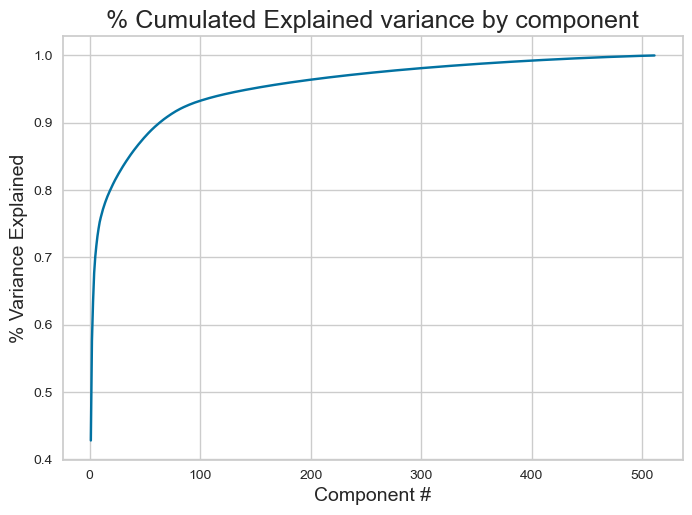

In [12]:
X_pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
p_components = np.arange(1,512)
plt.plot(p_components,X_pca_cumsum)
plt.title("% Cumulated Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [13]:
# get first element where the explained variance ratio is 0.85
np.where(X_pca_cumsum >= 0.85)[0]

array([ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

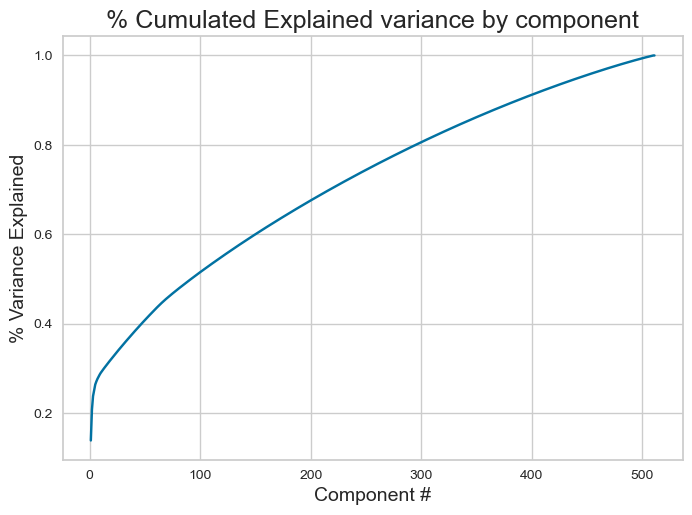

In [14]:
X_pca_transformed_cumsum = np.cumsum(pca_transformed_fit.explained_variance_ratio_)
p_components = np.arange(1,512)
plt.plot(p_components,X_pca_transformed_cumsum)
plt.title("% Cumulated Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [15]:
np.where(X_pca_transformed_cumsum >= 0.85)[0]

array([338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
       429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
       442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
       455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
       468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480,
       481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493,
       494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506,
       507, 508, 509, 510], dtype=int64)

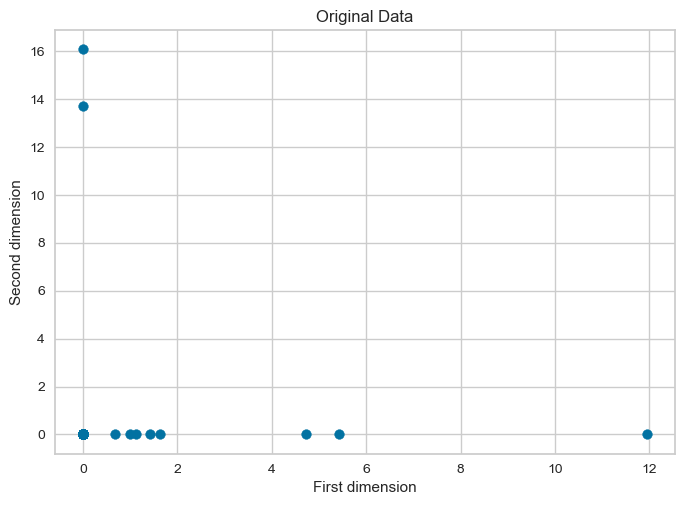

In [16]:
plt.scatter(X[:,0],X[:,1])
plt.title("Original Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

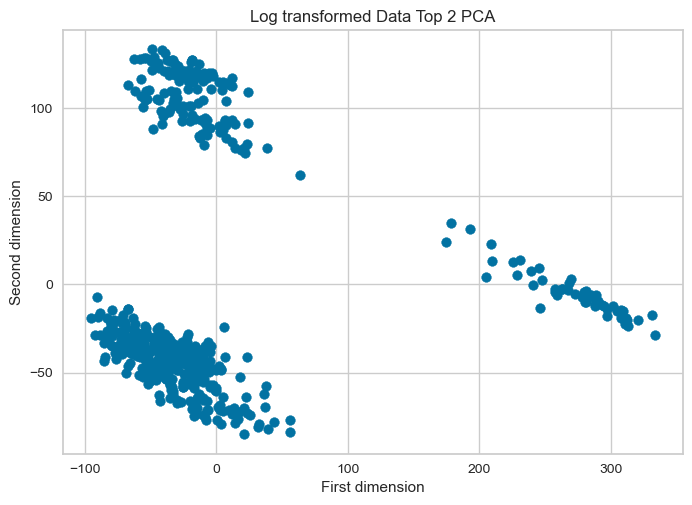

In [17]:
plt.scatter(X_transformed_pca[:,0],X_transformed_pca[:,1])
plt.title("Log transformed Data Top 2 PCA")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

In [18]:
mds = MDS()
embedded_cord = mds.fit_transform(X_transformed)
embedded_cord.shape

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(511, 2)

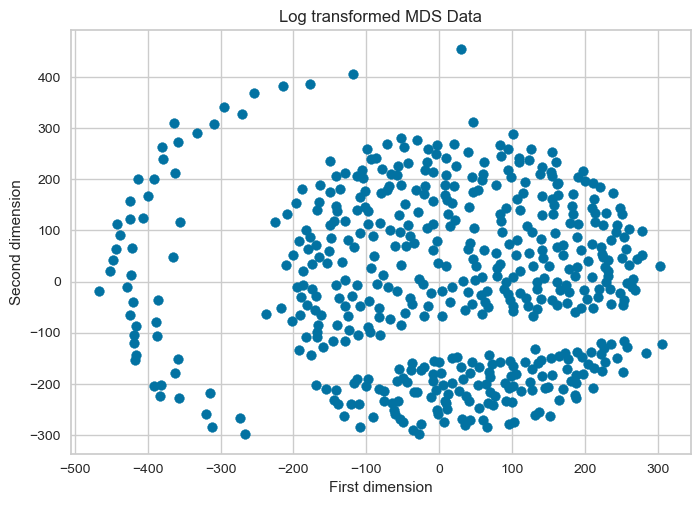

In [19]:
plt.scatter(embedded_cord[:,0],embedded_cord[:,1])
plt.title("Log transformed MDS Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

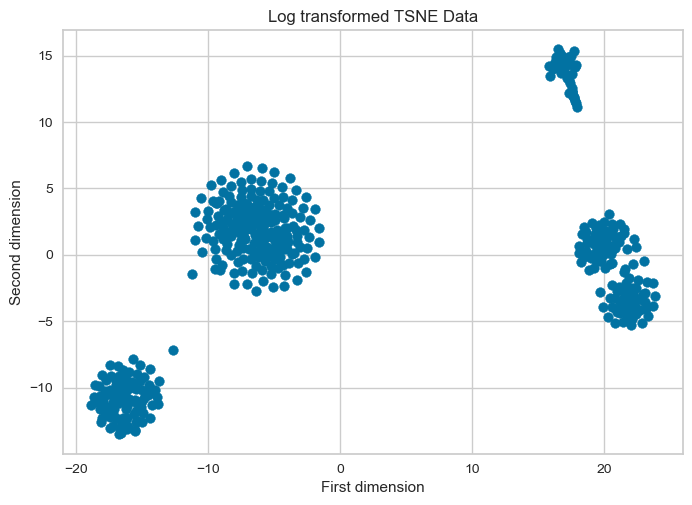

In [43]:
tsne = TSNE(perplexity= 20)
tsne_embedded = tsne.fit_transform(X_transformed)
plt.scatter(tsne_embedded[:,0],tsne_embedded[:,1])
plt.title("Log transformed TSNE Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

In [44]:
top_50_pca = X_transformed_pca[:,0:50]
top_50_pca.shape

(511, 50)

In [45]:
tsne = TSNE(perplexity= 40)
tsne_embedded = tsne.fit_transform(top_50_pca)
tsne_embedded.shape

(511, 2)

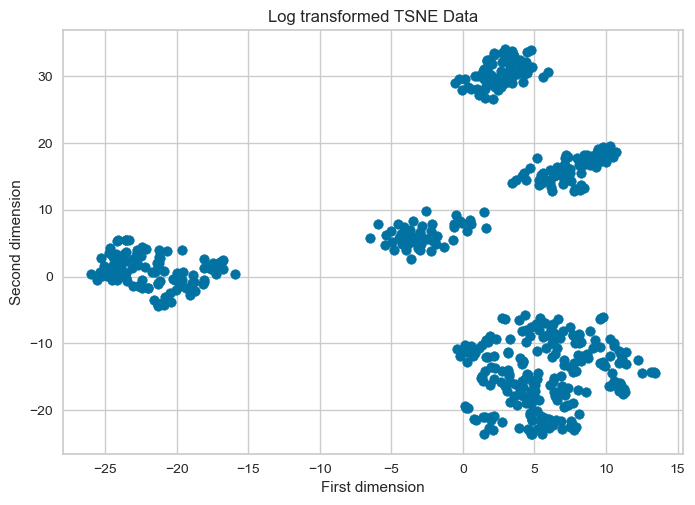

In [46]:
plt.scatter(tsne_embedded[:,0],tsne_embedded[:,1])
plt.title("Log transformed TSNE Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

### Clustering

In [47]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
y_kmeans = kmeans.labels_

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


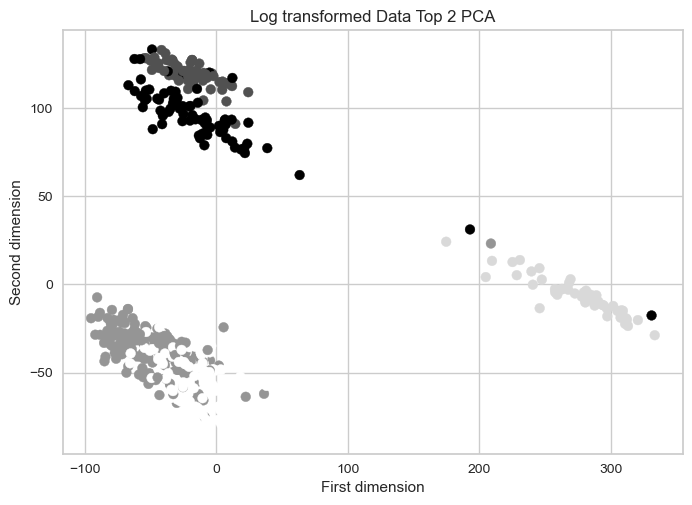

In [48]:
plt.scatter(top_50_pca[:,0],top_50_pca[:,1],c=y_kmeans)
plt.title("Log transformed Data Top 2 PCA")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

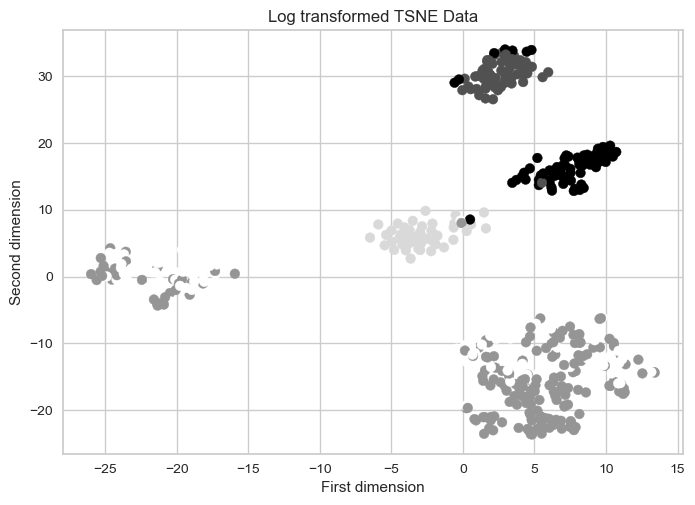

In [49]:
plt.scatter(tsne_embedded[:,0],tsne_embedded[:,1],c=y_kmeans)
plt.title("Log transformed TSNE Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


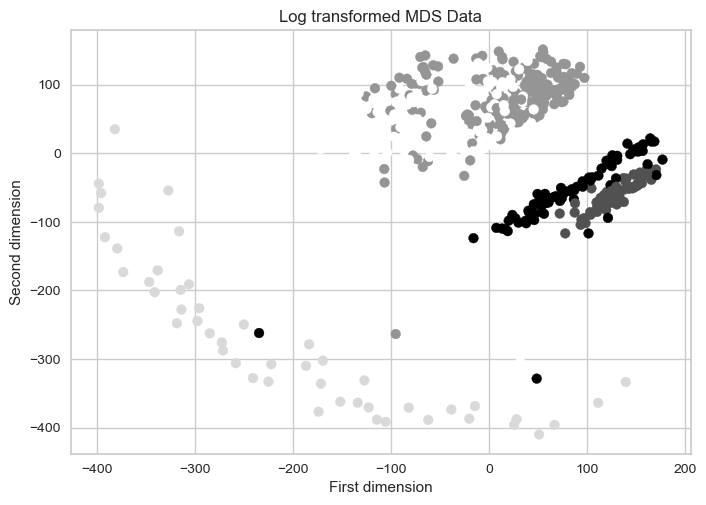

In [50]:
embedded_cord = mds.fit_transform(top_50_pca)
plt.scatter(embedded_cord[:,0],embedded_cord[:,1],c=y_kmeans)
plt.title("Log transformed MDS Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

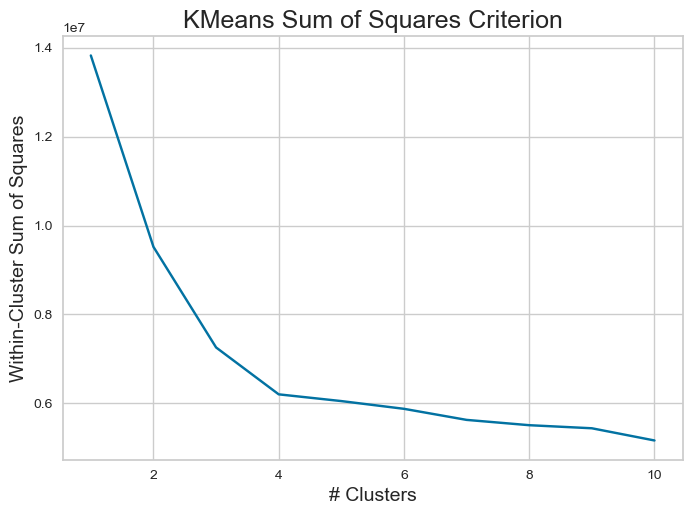

In [51]:
num_clusters = 10
all_kmeans = [KMeans(n_clusters=i+1,n_init="auto") for i in range(num_clusters)]

for kmeans in all_kmeans:
    kmeans.fit(top_50_pca)
    
inertias = [all_kmeans[i].inertia_ for i in range(num_clusters)]
plt.plot(np.arange(1,num_clusters + 1),inertias)
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show()

In [28]:
all_kmeans[3].inertia_

6202929.841899471

In [29]:
kmeans_chosen = KMeans(n_clusters=4,n_init="auto").fit(top_50_pca)
kmeans_chosen.labels_.shape

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(511,)

In [30]:
np.mean(X[np.where(kmeans_chosen.labels_ == 1)],axis = 0)

array([  0.        ,   0.        , 113.06160014, ...,   0.        ,
         0.        ,   0.        ])

In [31]:
means = np.array([np.mean(X[np.where(kmeans_chosen.labels_ == i)],axis = 0) for i in range(4)])
means.shape

(4, 45768)

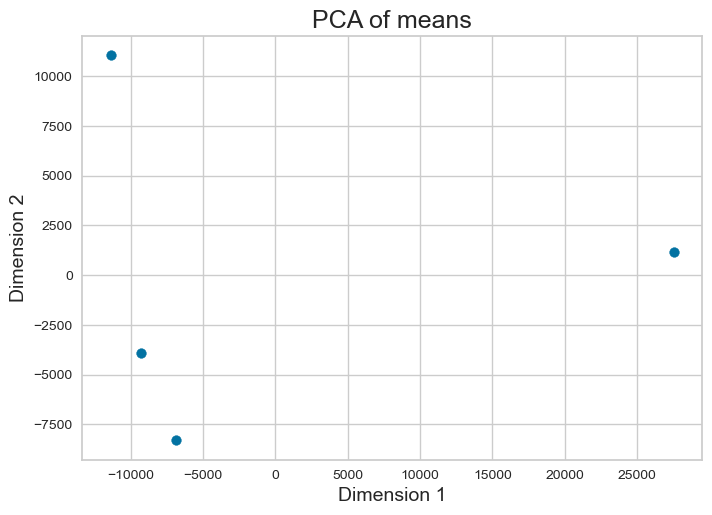

In [32]:
X_means_pca = pca.fit_transform(means)
plt.scatter(X_means_pca[:,0],X_means_pca[:,1])
plt.title("PCA of means",size=18)
plt.xlabel("Dimension 1",size=14)
plt.ylabel("Dimension 2",size=14)
plt.show()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


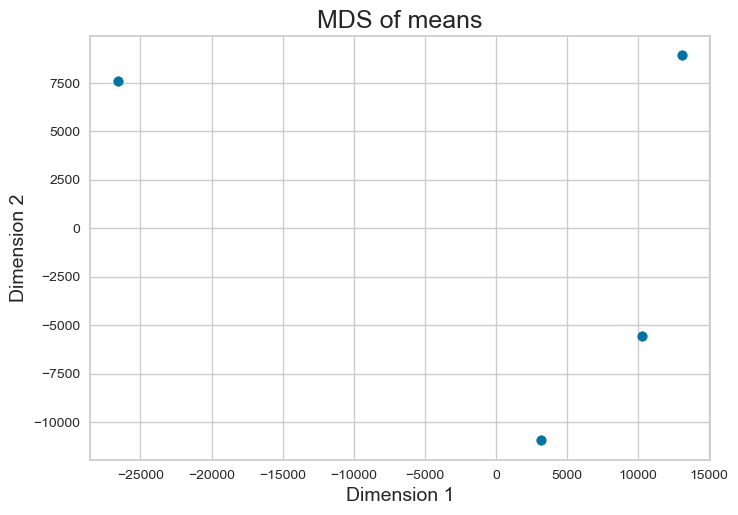

In [33]:
X_means_mds = MDS().fit_transform(means)
plt.scatter(X_means_mds[:,0],X_means_mds[:,1])
plt.title("MDS of means",size=18)
plt.xlabel("Dimension 1",size=14)
plt.ylabel("Dimension 2",size=14)
plt.show()

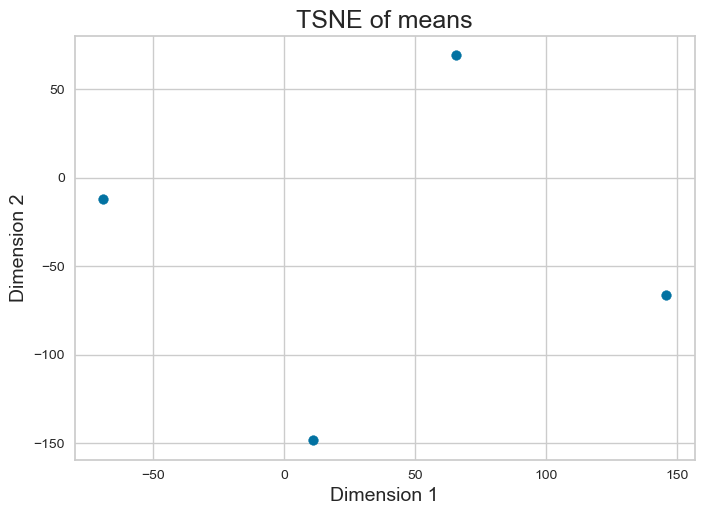

In [34]:
X_means_tsne = TSNE(perplexity=3).fit_transform(means)
plt.scatter(X_means_tsne[:,0],X_means_tsne[:,1])
plt.title("TSNE of means",size=18)
plt.xlabel("Dimension 1",size=14)
plt.ylabel("Dimension 2",size=14)
plt.show()

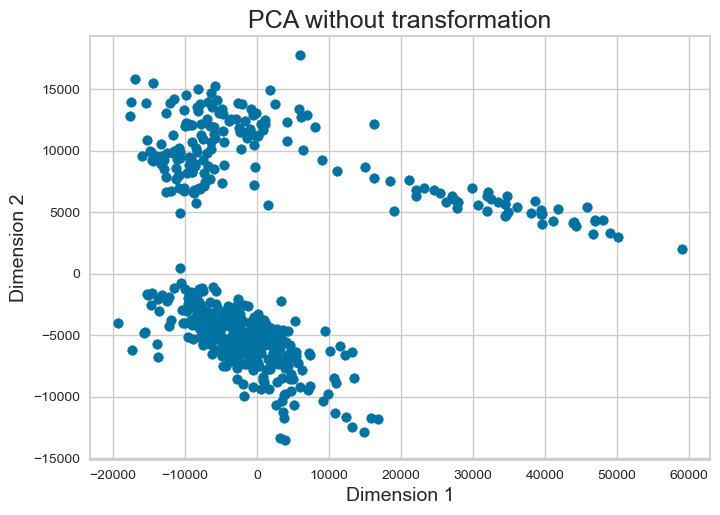

In [35]:
pca_without_transform = PCA().fit_transform(X)
plt.scatter(pca_without_transform[:,0],pca_without_transform[:,1])
plt.title("PCA without transformation",size=18)
plt.xlabel("Dimension 1",size=14)
plt.ylabel("Dimension 2",size=14)
plt.show()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


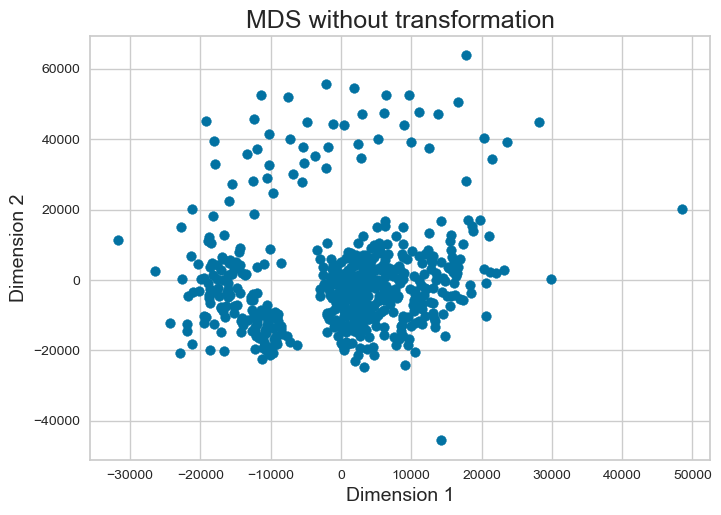

In [36]:
mds_without_transform = MDS().fit_transform(X)
plt.scatter(mds_without_transform[:,0],mds_without_transform[:,1])
plt.title("MDS without transformation",size=18)
plt.xlabel("Dimension 1",size=14)
plt.ylabel("Dimension 2",size=14)
plt.show()

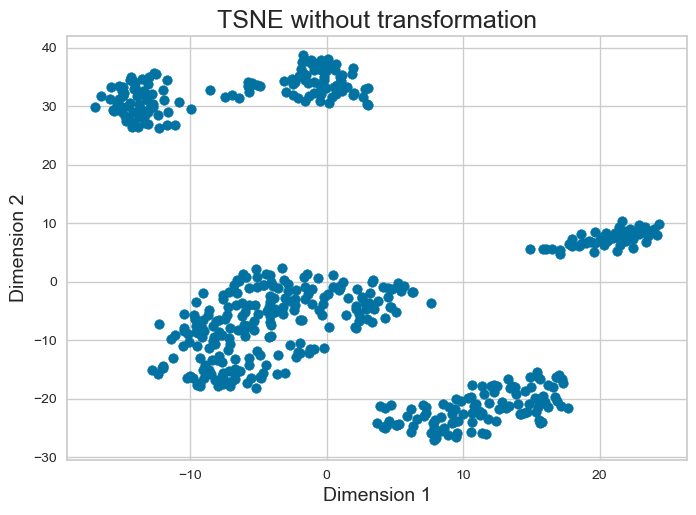

In [37]:
tsne_without_transform = TSNE().fit_transform(X)
plt.scatter(tsne_without_transform[:,0],tsne_without_transform[:,1])
plt.title("TSNE without transformation",size=18)
plt.xlabel("Dimension 1",size=14)
plt.ylabel("Dimension 2",size=14)
plt.show()

## Written Report

### Problem 2

In [9]:
data_p2_path = "data/p2_unsupervised/X.npy"
X = np.load(data_p2_path)
X.shape

(2169, 45768)

In [10]:
X_transformed = np.log2(X+1)

In [11]:
np.max(X_transformed[:,0])

5.972169178513185

Part 1: Visualization

A scientist tells you that cells in the brain are either excitatory neurons, inhibitory neurons, or non-neuronal cells. Cells from each of these three groups serve different functions within the brain. Within each of these three types, there are numerous distinct sub-types that a cell can be, and sub-types of the same larger class can serve similar functions. Your goal is to produce visualizations which show how the scientist's knowledge reflects in the data.

As in Problem 1, we recommend using PCA before running T-SNE or clustering algorithms, for quality and computational reasons.

(3 points) Provide at least one visualization which clearly shows the existence of three main brain cell types as described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from different groups can differ greatly.

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_transformed)
X_pca.shape

(2169, 2169)

In [13]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)
cum_variance

array([0.15494937, 0.19925099, 0.2168146 , ..., 0.99993309, 1.        ,
       1.        ])

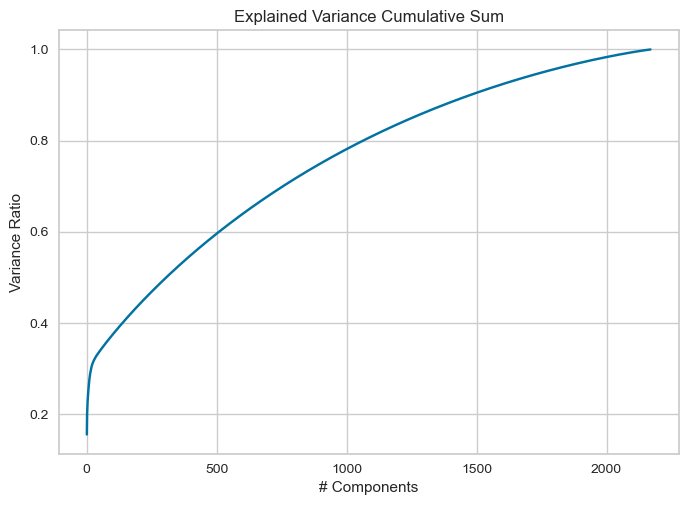

In [14]:
p_components = np.arange(1,2170)
plt.plot(p_components,cum_variance)
plt.title("Explained Variance Cumulative Sum")
plt.xlabel("# Components")
plt.ylabel("Variance Ratio")
plt.show()

In [15]:
def analyze_data(X : np.array, embeddings = ["mds"],labels = None, draw_labels = True, 
                 cluster = True, pca_first = True, k_clusters = [3, 5, 7],**kwargs):
    available_plots = ["pca","mds","tsne"]
    plots = [embedding.lower for embedding in embeddings]
    N = X.shape[0]
    p = X.shape[1]
    for embedding in embeddings:
        if embedding not in available_plots:
            raise Exception("plot not available")
    for k in k_clusters:
        if not isinstance(k, int):
            raise Exception("Number of clusters are not integers")
        if k not in range(1, p):
            raise Exception("Clusters are not in valid range")
    if cluster:
        all_kmeans = [KMeans(k, n_init = 'auto').fit(X) for k in k_clusters]
    if pca_first:
        X = PCA().fit_transform(X)
    for embedding in embeddings:
        if embedding == "mds":
            embed = MDS()
        elif embedding == "tsne":
            embed = TSNE()
        X = embed.fit_transform(X)
        if draw_labels:
            for kmean in all_kmeans:
                plt.scatter(X[:,0],X[:,1],c=kmean.labels_)
                plt.title("Explained Variance Cumulative Sum")
                plt.xlabel("# Components")
                plt.ylabel("Variance Ratio")
                plt.show()
        else:
            plt.scatter(X[:,0],X[:,1])
            plt.title(f"{embedding.upper()} Plot")
            plt.xlabel("First dimension")
            plt.ylabel("Second dimension")
            plt.show()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit

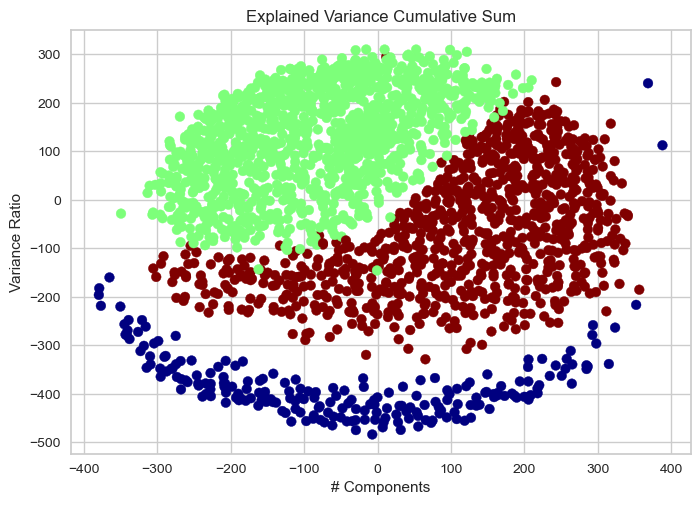

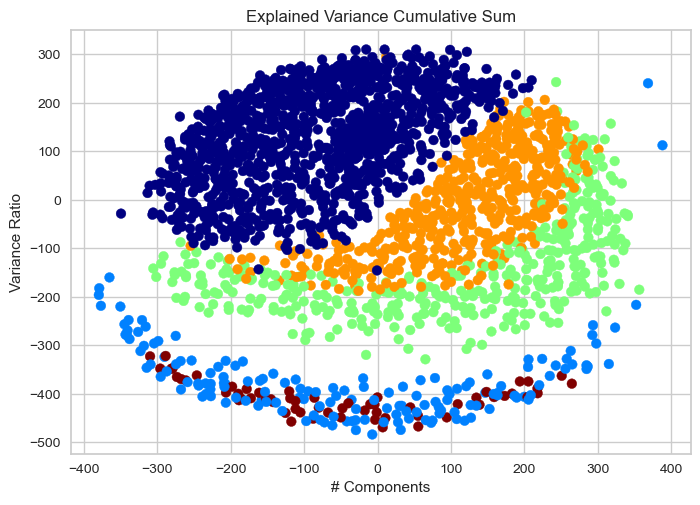

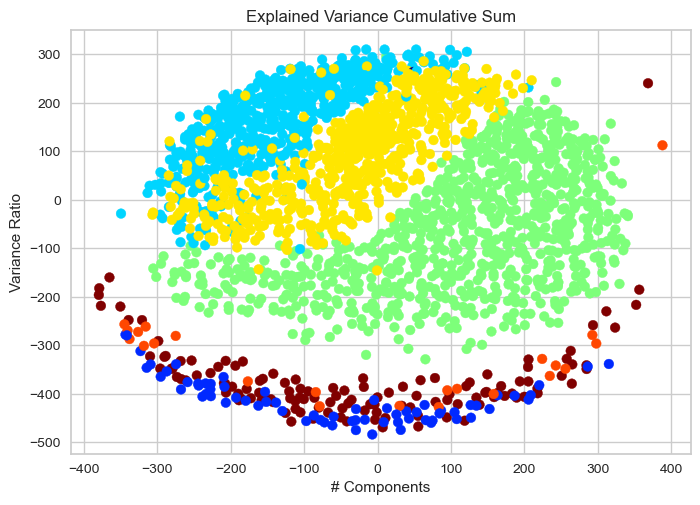

In [17]:
analyze_data(X_transformed)

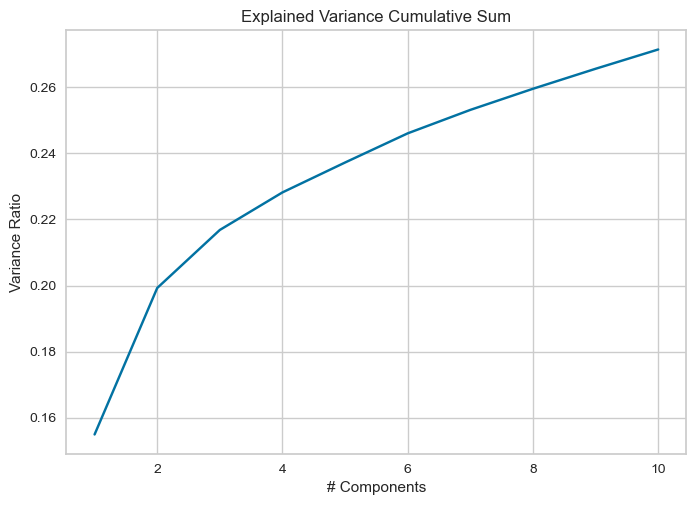

In [18]:
p_components = np.arange(1,2170)
plt.plot(p_components[0:10],cum_variance[0:10])
plt.title("Explained Variance Cumulative Sum")
plt.xlabel("# Components")
plt.ylabel("Variance Ratio")
plt.show()

In [19]:
k_clusters = [3,5,7,9,11,13,15,17,20]
all_kmeans = [KMeans(k, n_init = 'auto').fit(X_pca) for k in k_clusters]

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

In [16]:
plt.set_cmap('jet')

<Figure size 800x550 with 0 Axes>

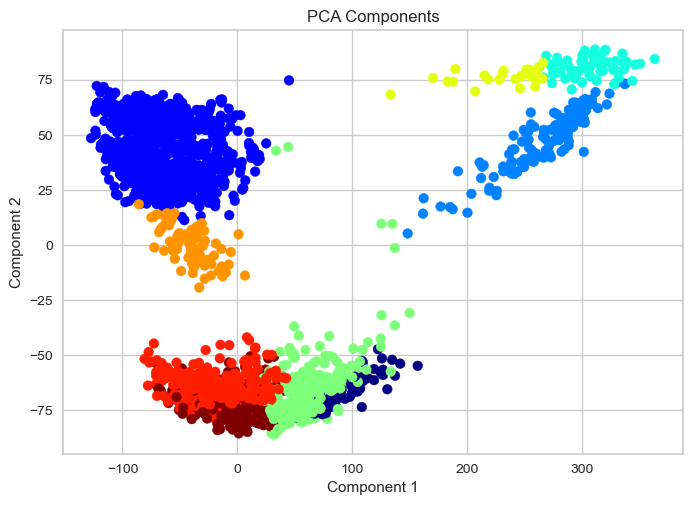

In [20]:
plt.scatter(X_pca[:,0],X_pca[:,1],c = all_kmeans[3].labels_)
plt.title("PCA Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [21]:
mds = MDS(n_components=2)
cells_mds_embedding = mds.fit_transform(X_pca)

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


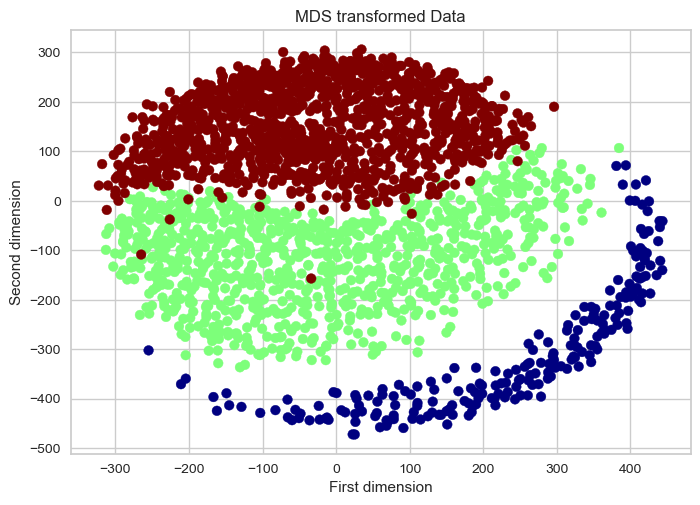

In [22]:
plt.scatter(cells_mds_embedding[:,0],cells_mds_embedding[:,1],c = all_kmeans[0].labels_)
plt.title("MDS transformed Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

In [23]:
tsne = TSNE(perplexity=40, early_exaggeration = 12)
cells_tsne_embedding = tsne.fit_transform(X_pca)

In [24]:
all_kmeans[8].n_clusters

20

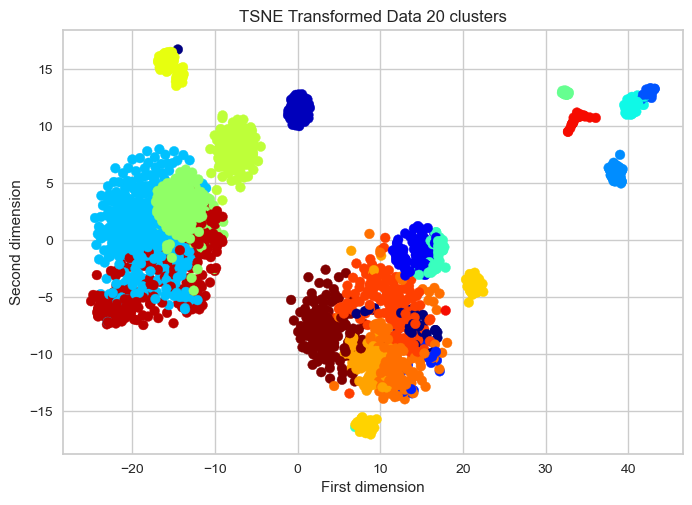

In [25]:
plt.scatter(cells_tsne_embedding[:,0],cells_tsne_embedding[:,1],c = all_kmeans[8].labels_)
plt.title(f"TSNE Transformed Data {all_kmeans[8].n_clusters} clusters")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()

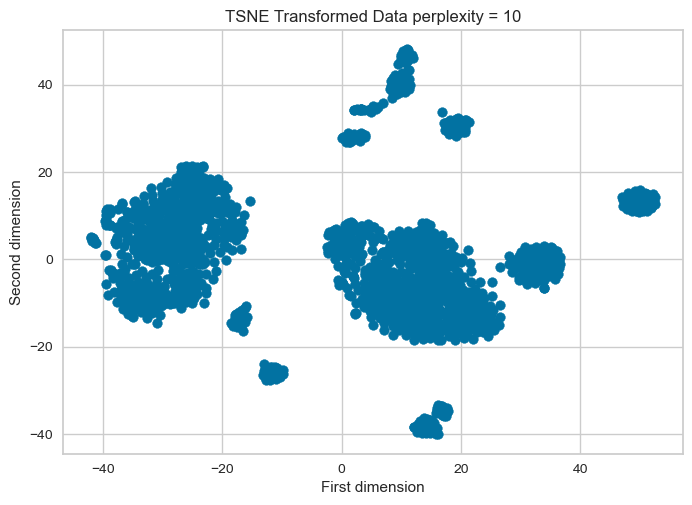

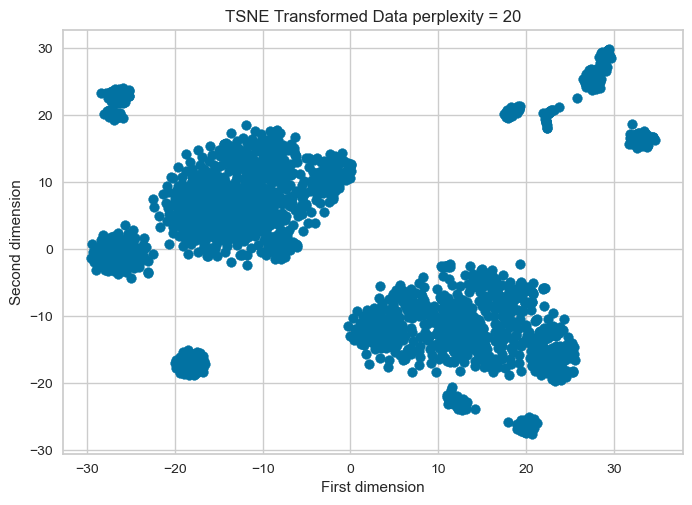

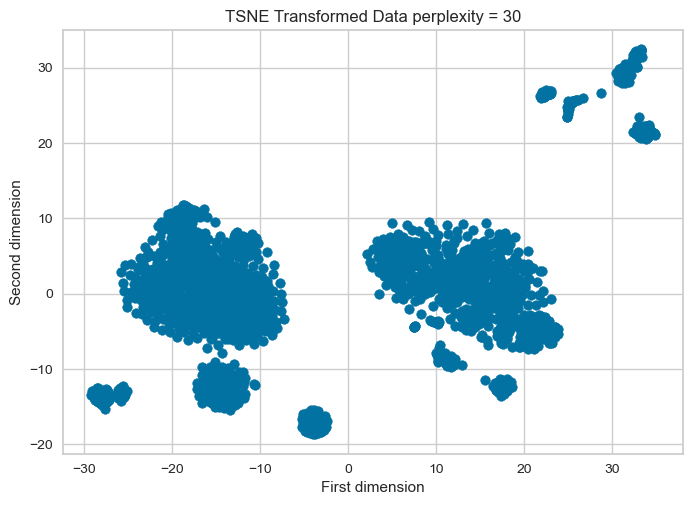

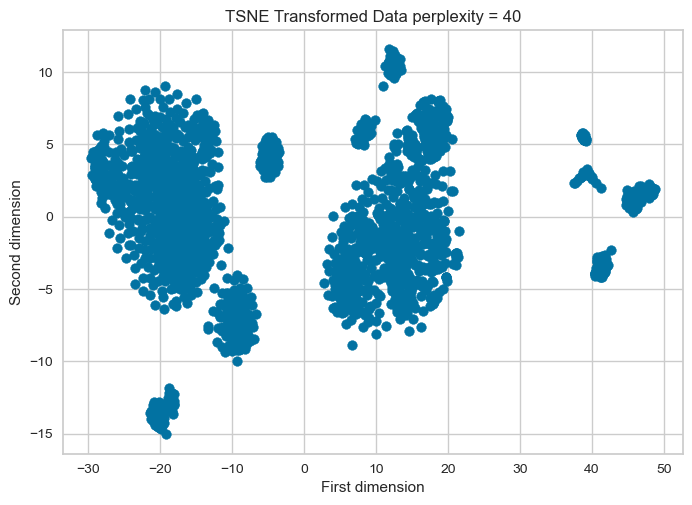

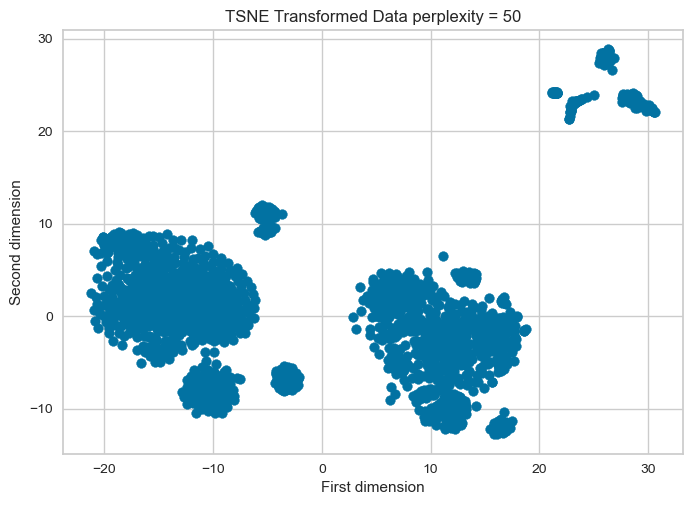

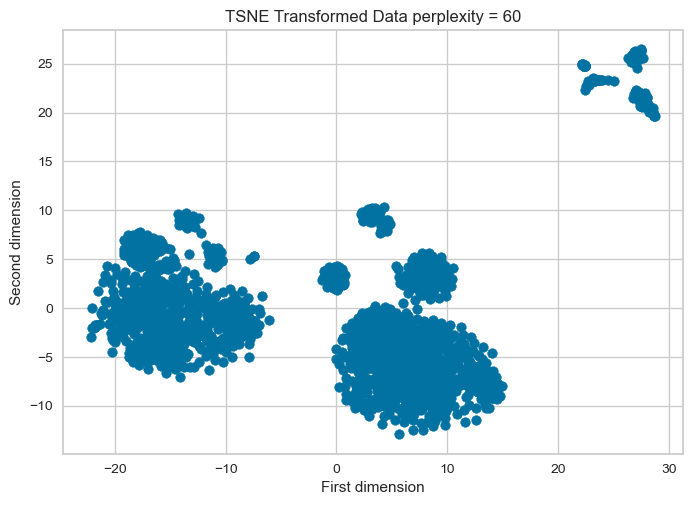

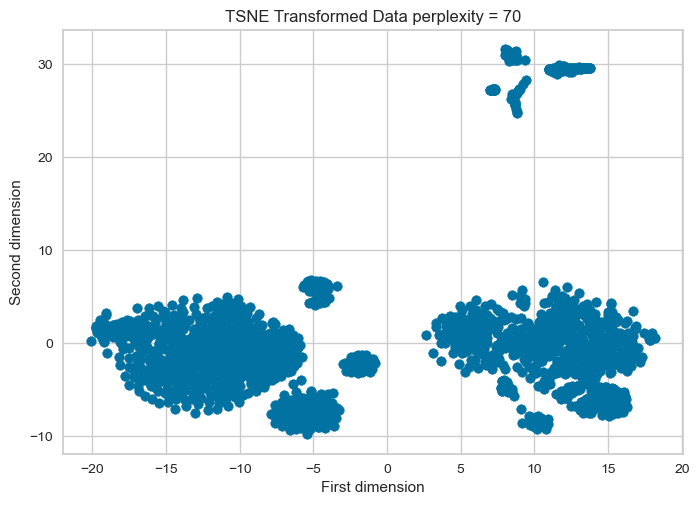

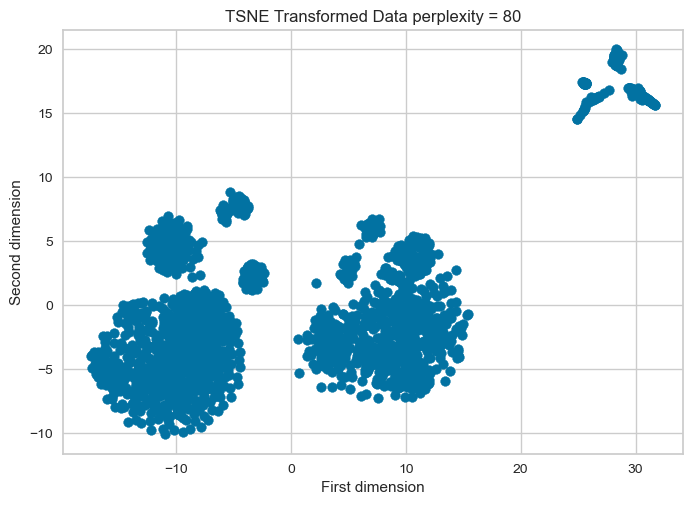

In [26]:
perplexities = [10,20,30,40,50,60,70,80]
for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity)
    cells_tsne_embedding = tsne.fit_transform(X_pca)
    plt.scatter(cells_tsne_embedding[:,0],cells_tsne_embedding[:,1])
    plt.title(f"TSNE Transformed Data perplexity = {perplexity}")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.show()

(4 points) Provide at least one visualization which supports the claim that within each of the three types, there are numerous possible sub-types for a cell. In your visualization, highlight which of the three main types these sub-types belong to. Again, explain how your visualization supports the claim.

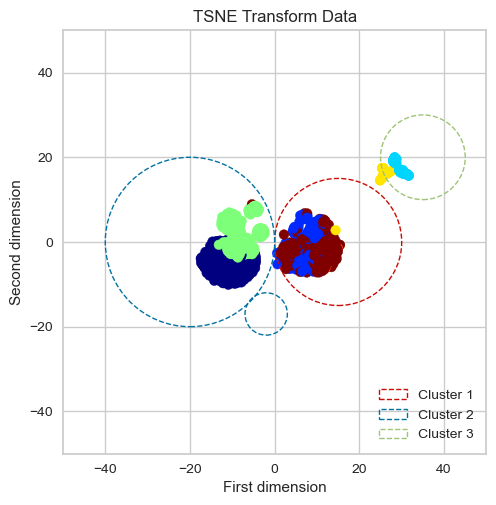

In [27]:
plt.scatter(cells_tsne_embedding[:,0],cells_tsne_embedding[:,1],c = all_kmeans[2].labels_)
circle1=plt.Circle(xy=(15,0), radius=15, color='r', linewidth=1,fill = False,linestyle = '--')
circle2=plt.Circle(xy=(-20,0), radius=20, color='b', linewidth=1,fill = False,linestyle = '--')
circle3=plt.Circle(xy=(35,20), radius=10, color='g', linewidth=1,fill = False,linestyle = '--')
circle4=plt.Circle(xy=(-2,-17), radius=5, color='b', linewidth=1,fill = False,linestyle = '--')
# get the current figure 
fig = plt.gcf()
# get the current Axes instance
ax = fig.gca()
# add the patch to the Axes
ax.add_patch(circle1)
# add the patch to the Axes
ax.add_patch(circle2)
# add the patch to the Axes
ax.add_patch(circle3)
# add the patch to the Axes
ax.add_patch(circle4)
plt.gca().set_aspect('equal', adjustable='box')
ax.legend([circle1, circle2, circle3], ['Cluster 1', 'Cluster 2', 'Cluster 3'],loc = "lower right")
plt.title("TSNE Transform Data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.show()

Part 2: Unsupervised Feature Selection

Now we attempt to find informative genes which can help us differentiate between cells, using only unlabeled data. A genomics researcher would use specialized, domain-specific tools to select these genes. We will instead take a general approach using logistic regression in conjunction with clustering. Briefly speaking, we will use the p2_unsupervised dataset to cluster the data. Treating those cluster labels as ground truth, we will fit a logistic regression model and use its coefficients to select features. Finally, to evaluate the quality of these features, we will fit another logistic regression model on the training set in p2_evaluation, and run it on the test set in the same folder.

(4 points) Using your clustering method(s) of choice, find a suitable clustering for the cells. Briefly explain how you chose the number of clusters by appropriate visualizations and/or numerical findings. (to cluster cells into the subcategories instead of categories)

In [28]:
max_clusters = 40
k_clusters = np.arange(2,max_clusters)
all_kmeans = [KMeans(k,n_init = 'auto').fit(X) for k in k_clusters]
inertias = [kmean.inertia_ for kmean in all_kmeans]

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

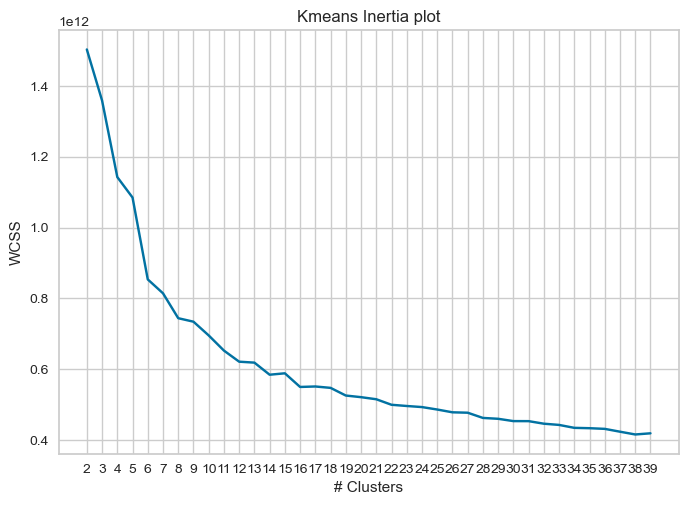

In [29]:
plt.plot(k_clusters, inertias)
plt.xticks(k_clusters)
plt.title("Kmeans Inertia plot")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show()

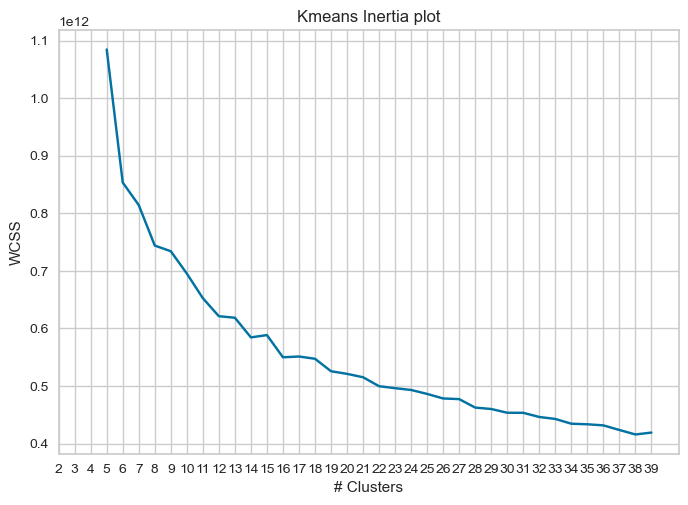

In [30]:
plt.plot(k_clusters[3:], inertias[3:])
plt.xticks(k_clusters)
plt.title("Kmeans Inertia plot")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show()

Part 2: Unsupervised Feature Selection

Now we attempt to find informative genes which can help us differentiate between cells, using only unlabeled data. A genomics researcher would use specialized, domain-specific tools to select these genes. We will instead take a general approach using logistic regression in conjunction with clustering. Briefly speaking, we will use the p2_unsupervised dataset to cluster the data. Treating those cluster labels as ground truth, we will fit a logistic regression model and use its coefficients to select features. Finally, to evaluate the quality of these features, we will fit another logistic regression model on the training set in p2_evaluation, and run it on the test set in the same folder.

(4 points) Using your clustering method(s) of choice, find a suitable clustering for the cells. Briefly explain how you chose the number of clusters by appropriate visualizations and/or numerical findings. (to cluster cells into the subcategories instead of categories)

In [31]:
len(all_kmeans)

38

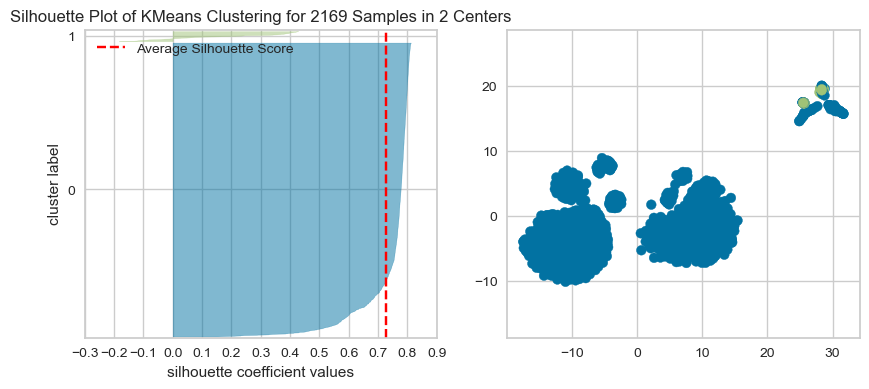

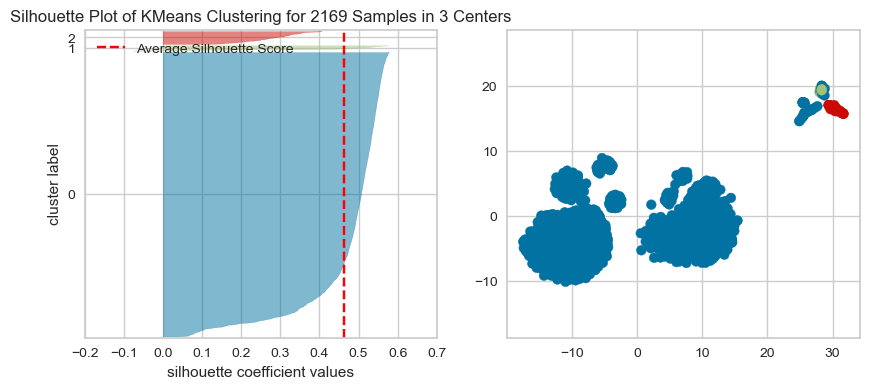

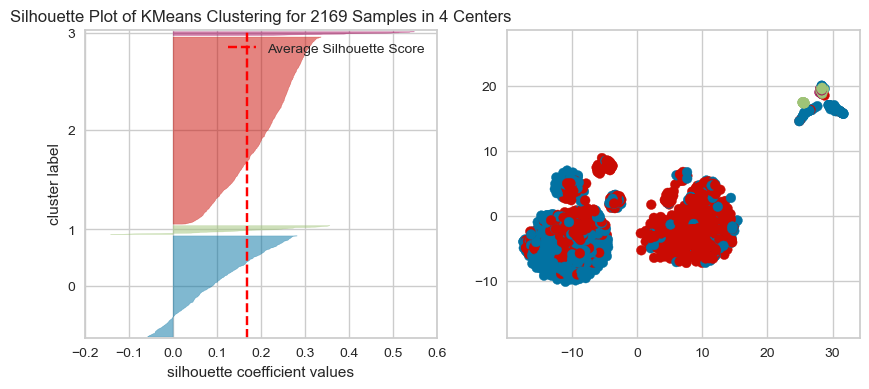

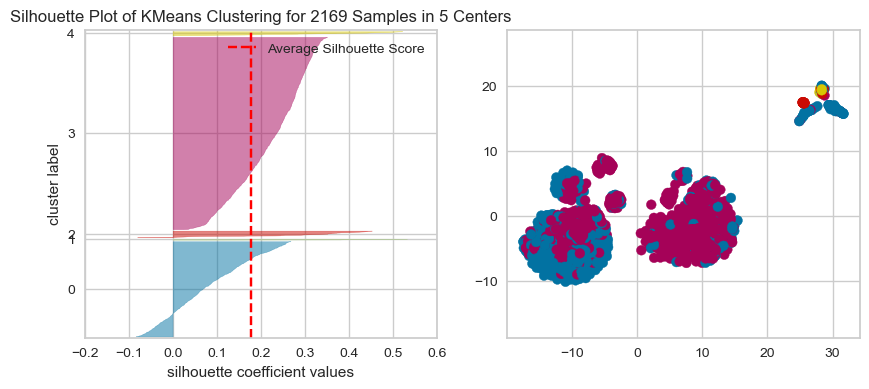

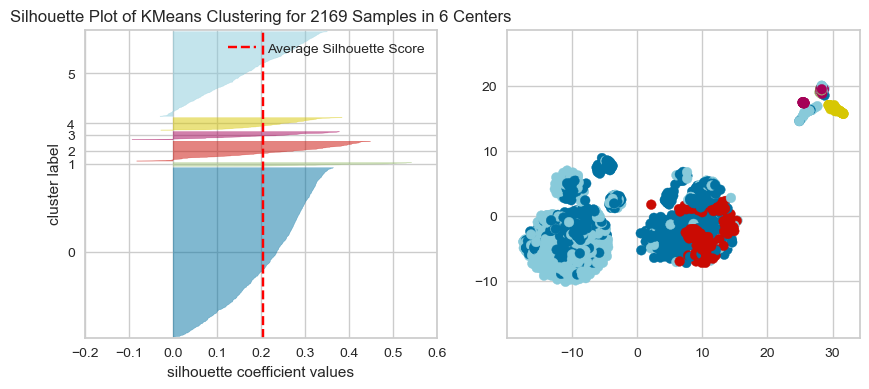

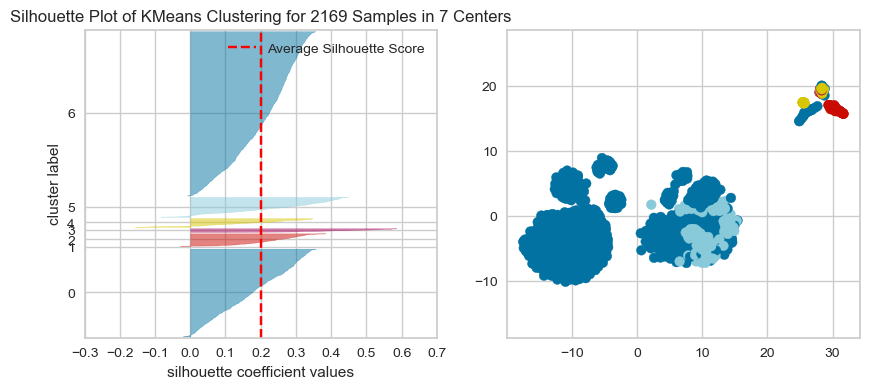

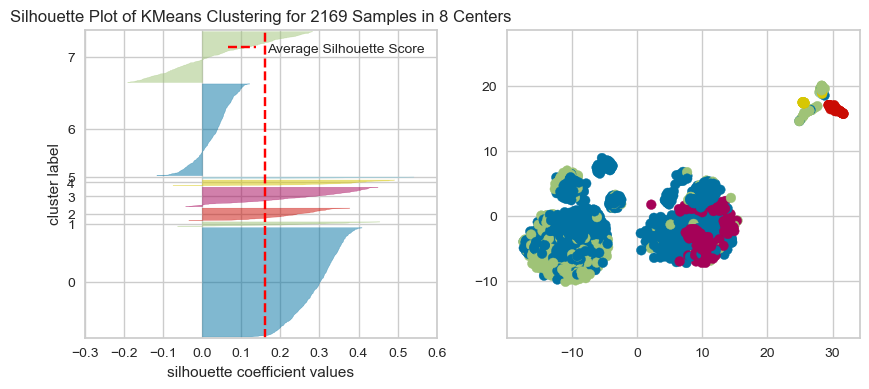

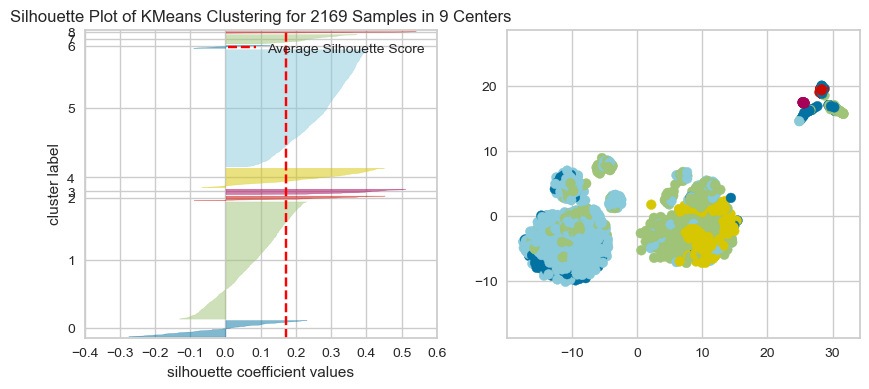

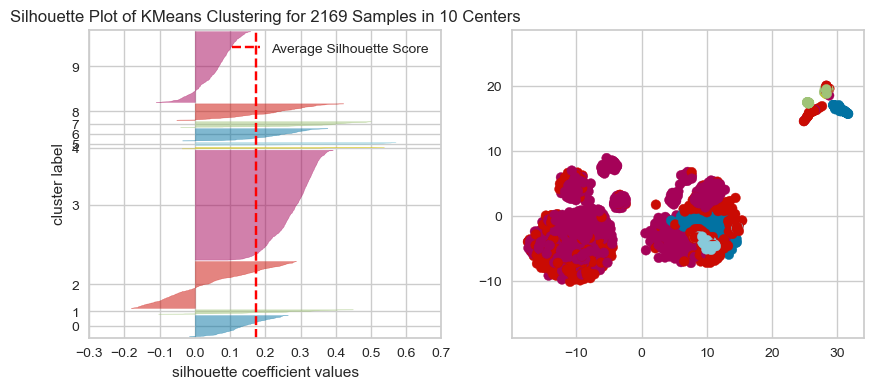

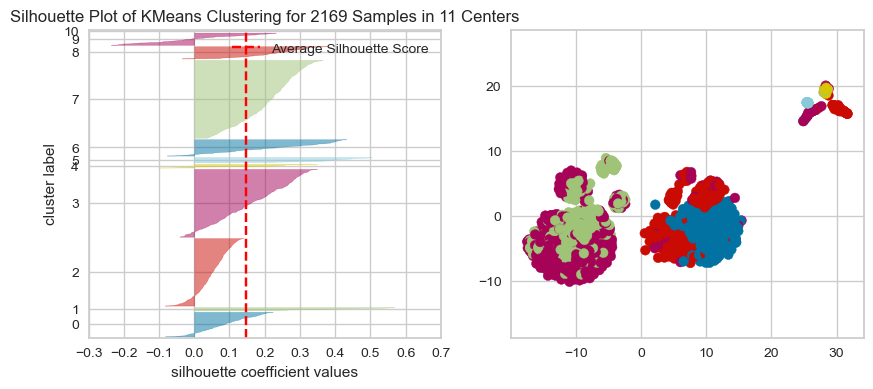

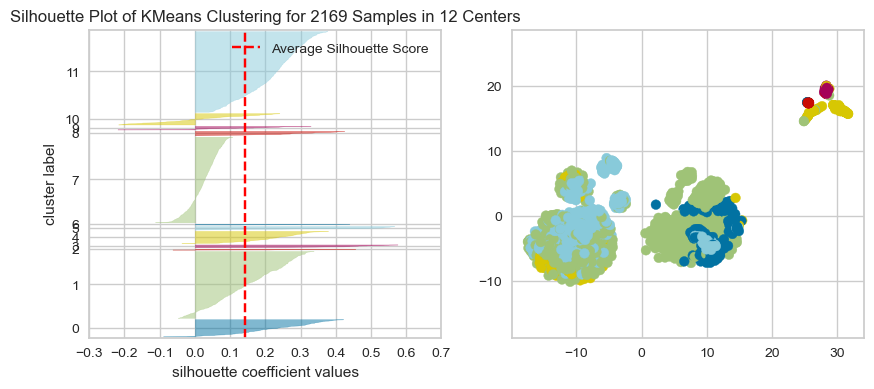

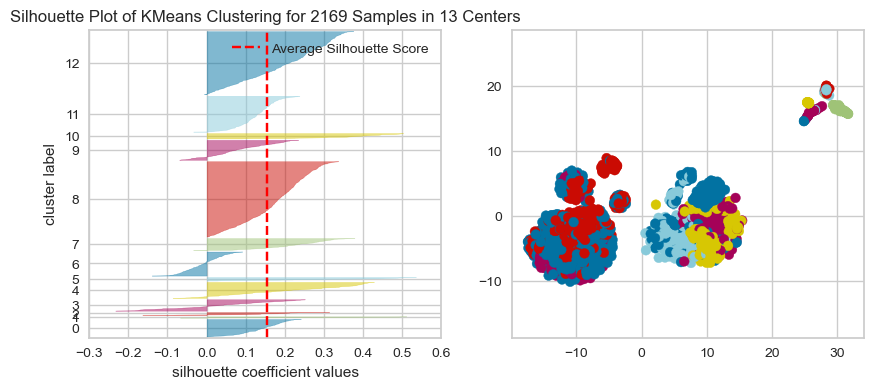

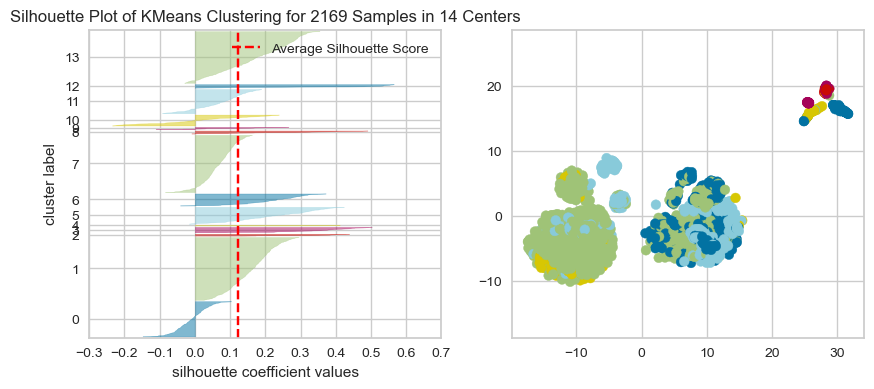

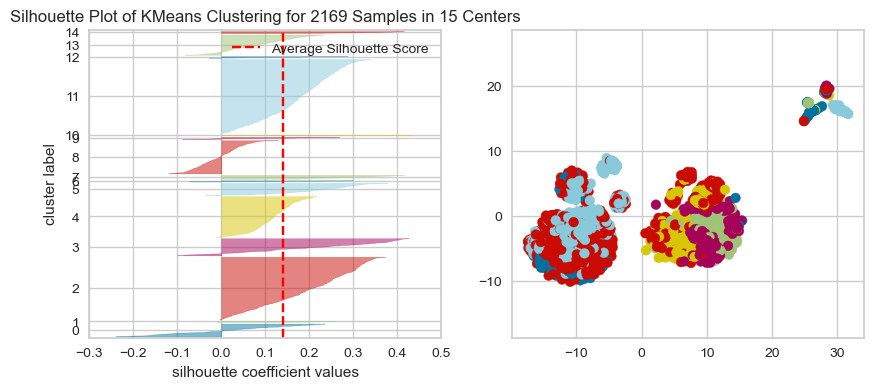

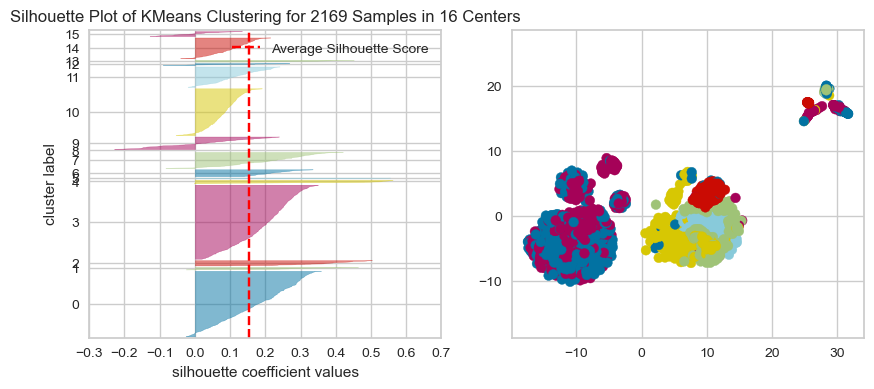

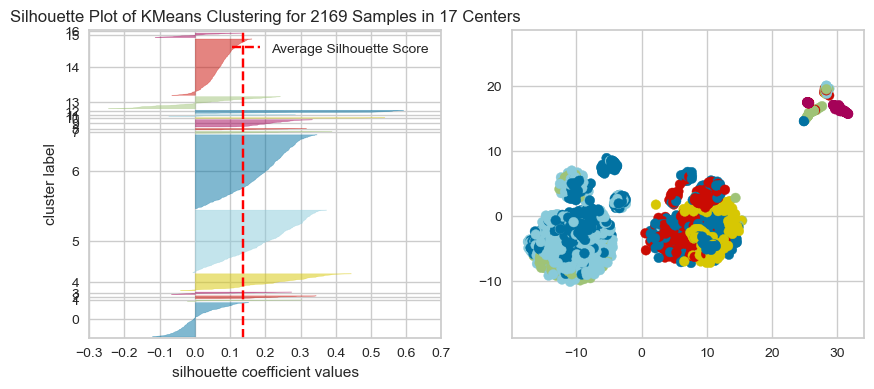

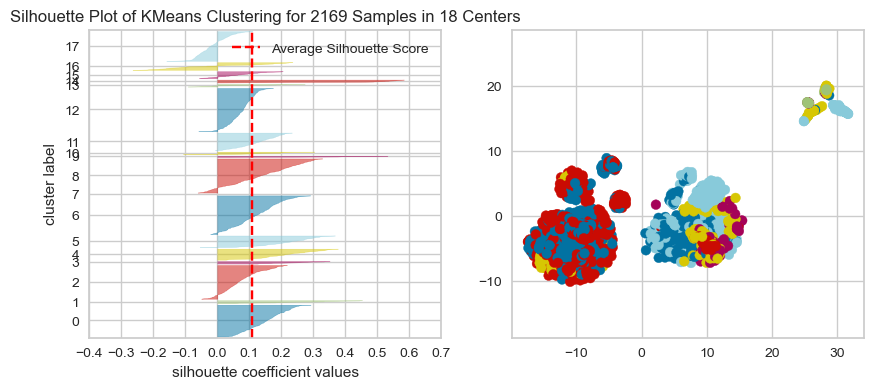

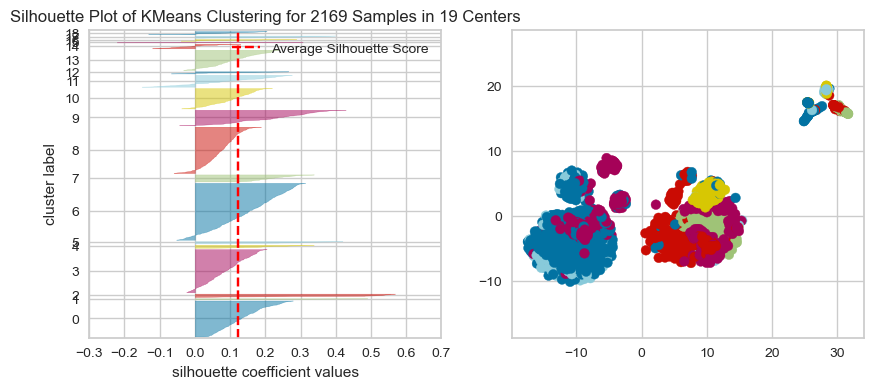

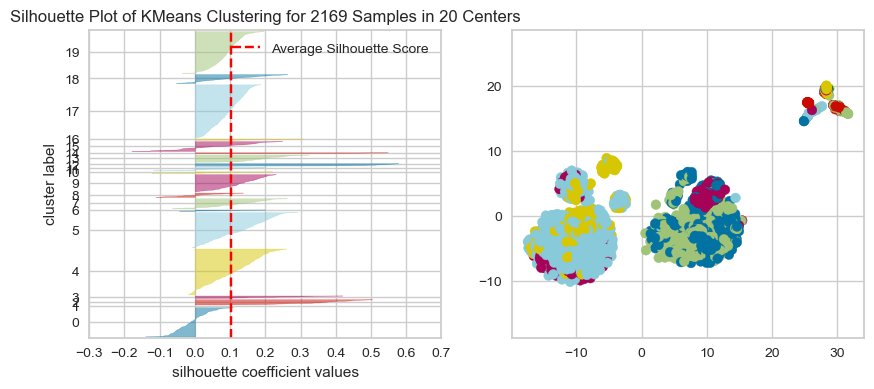

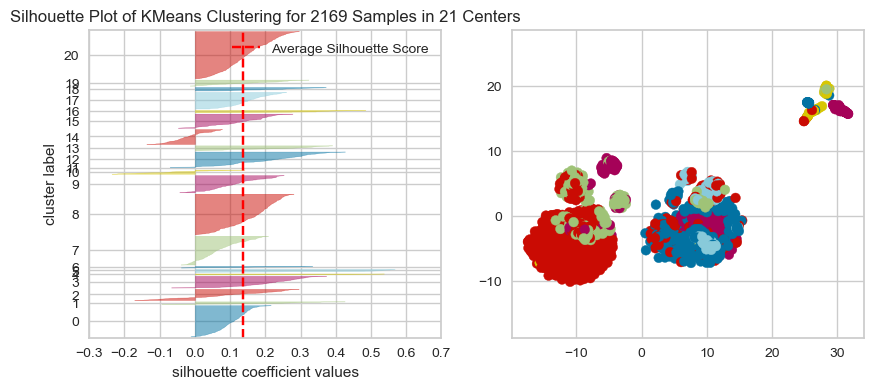

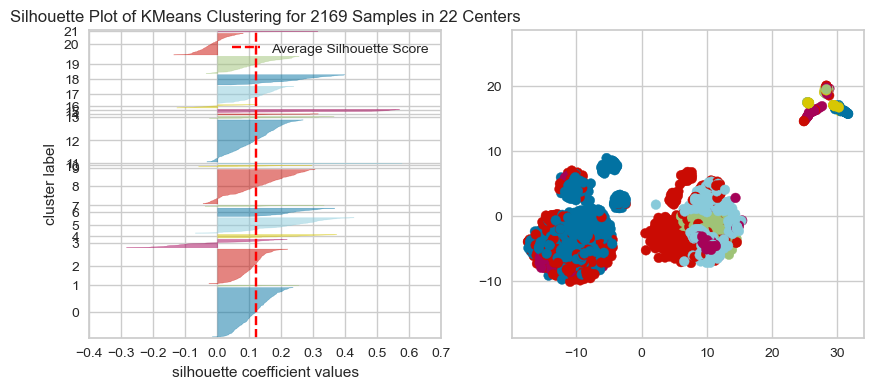

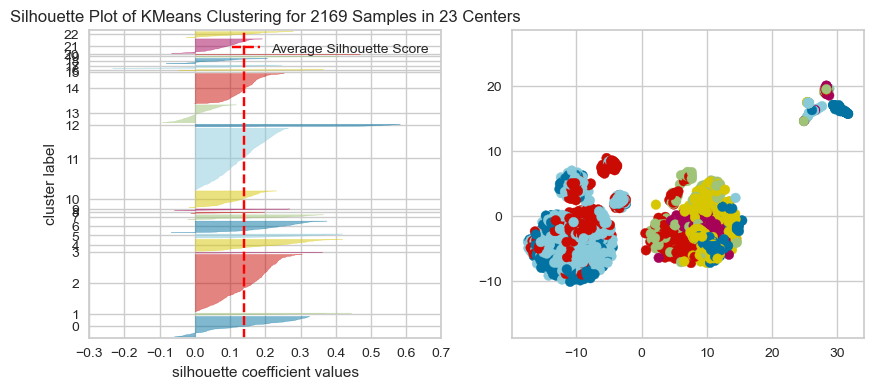

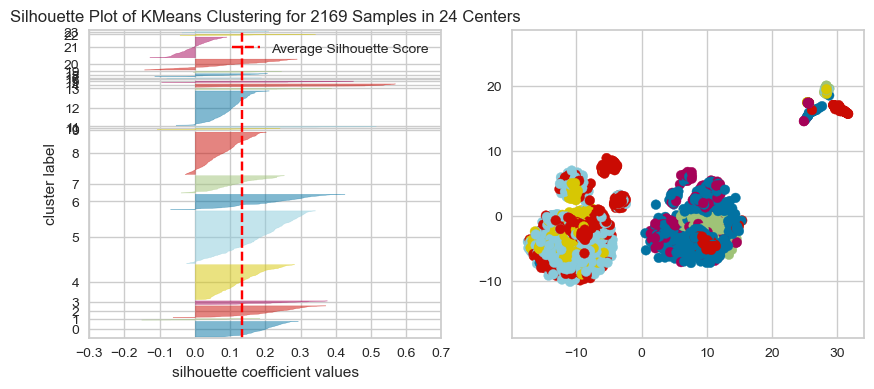

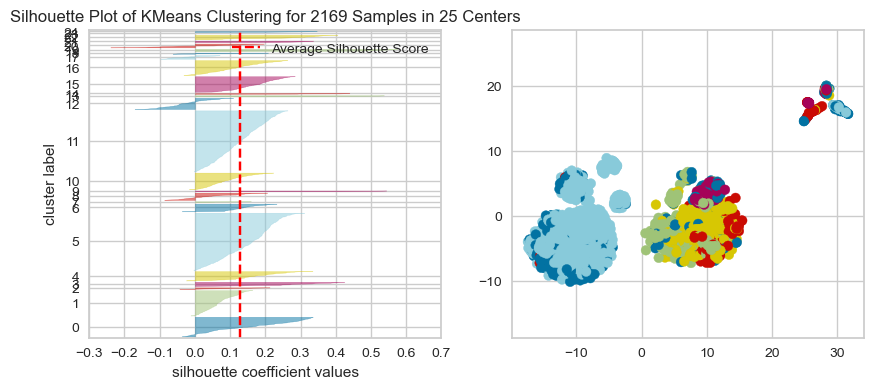

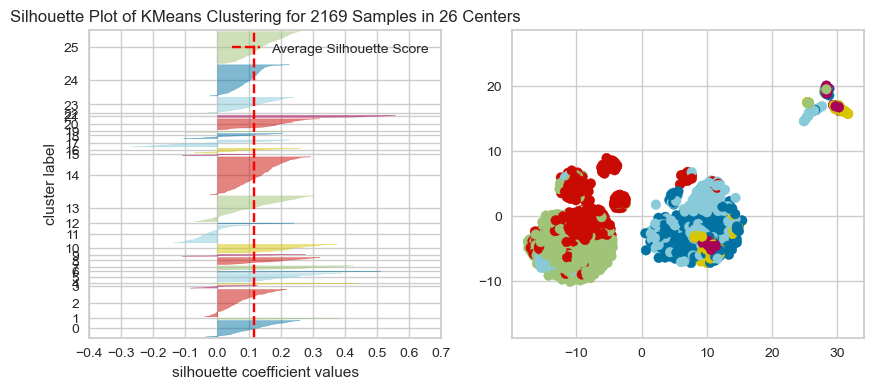

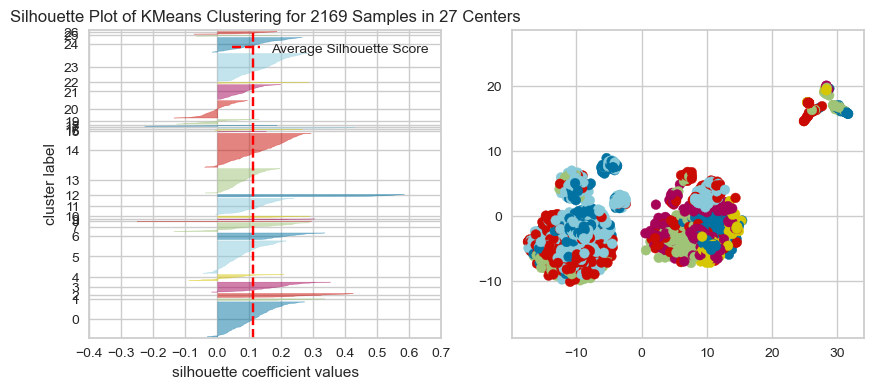

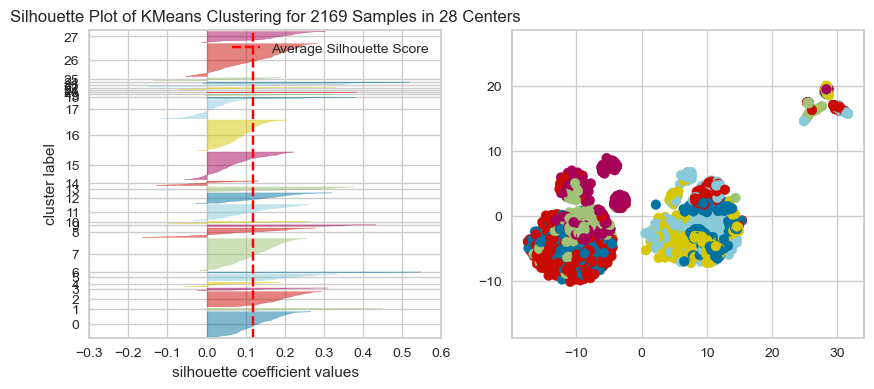

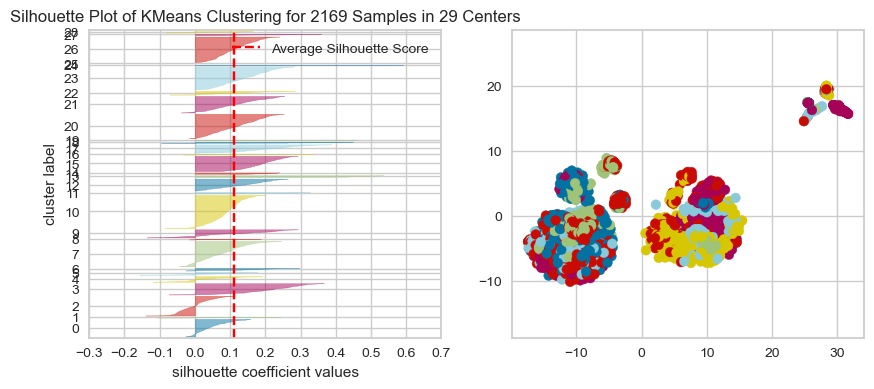

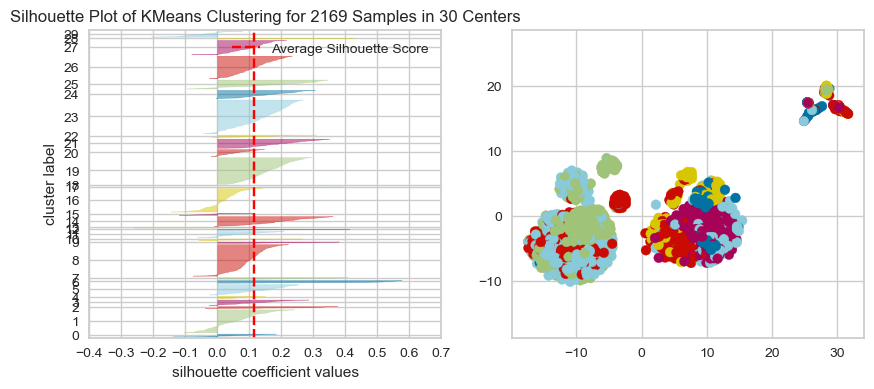

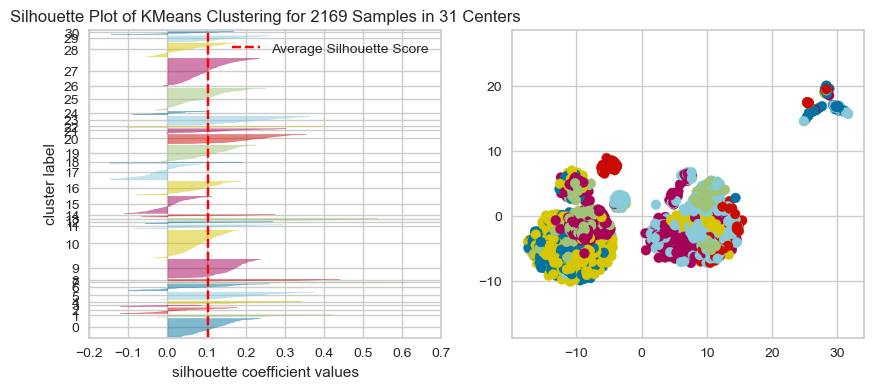

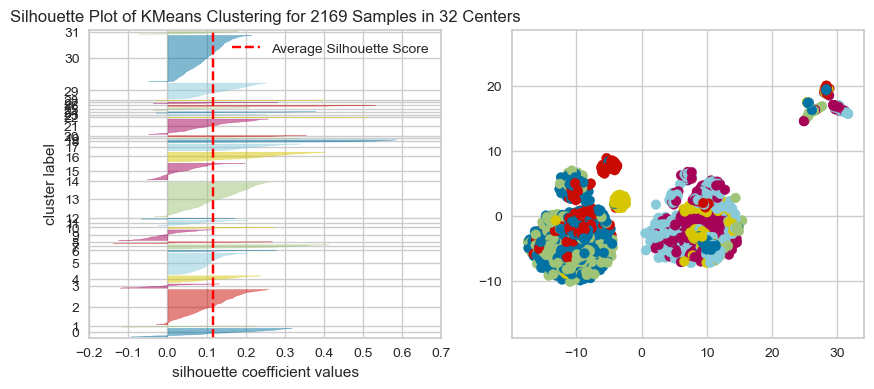

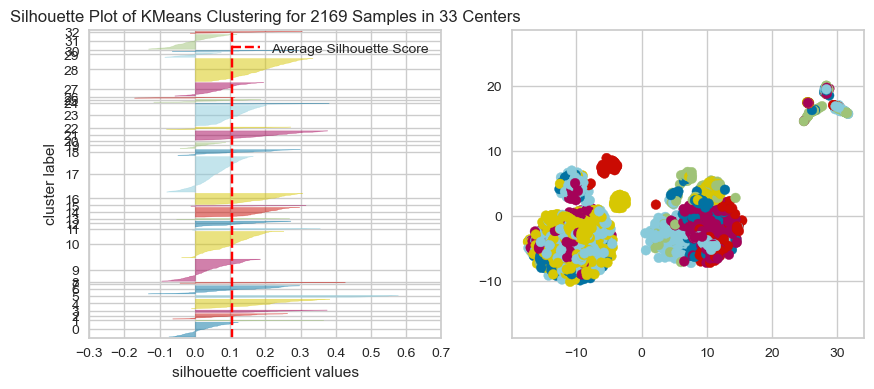

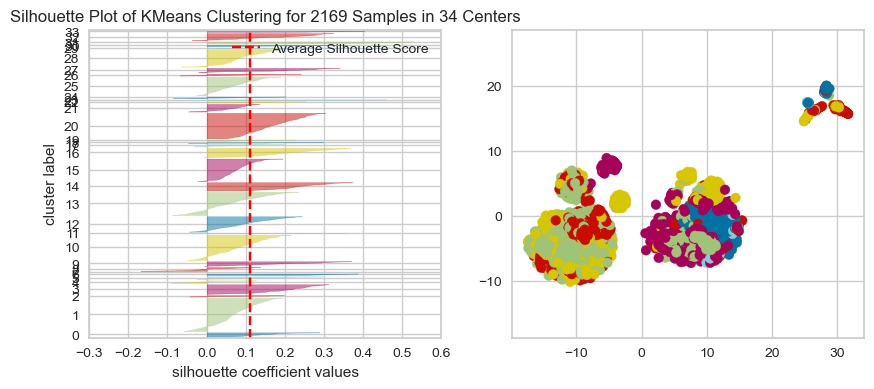

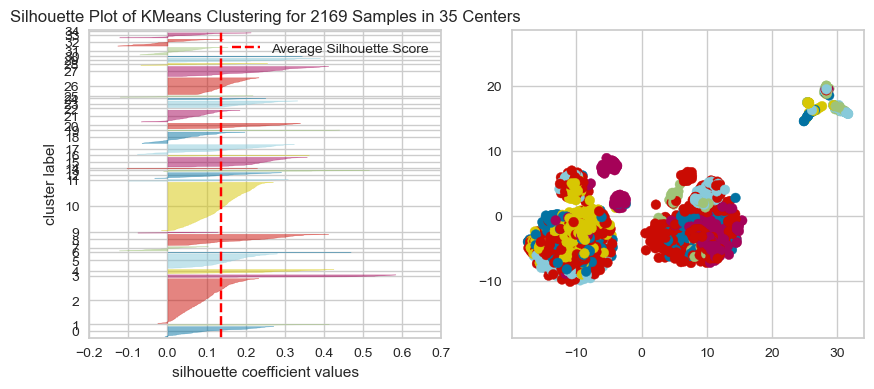

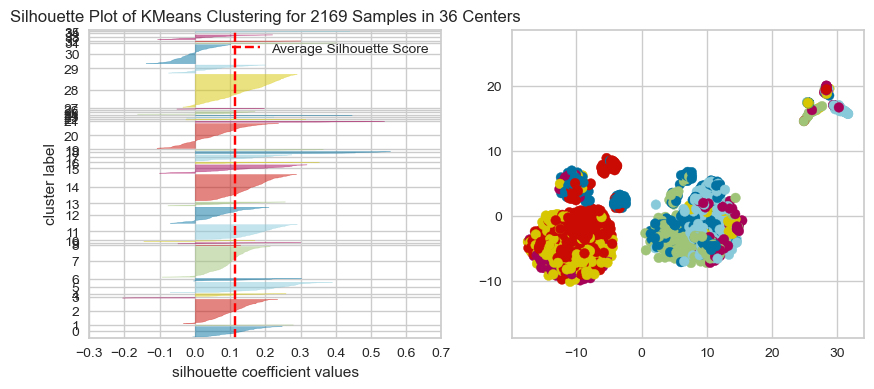

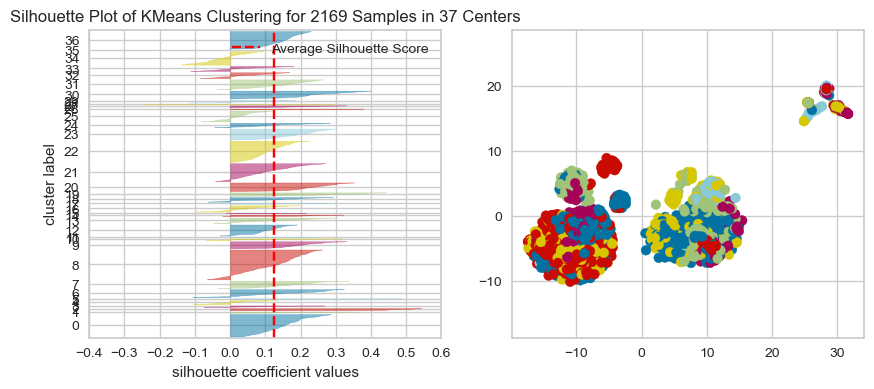

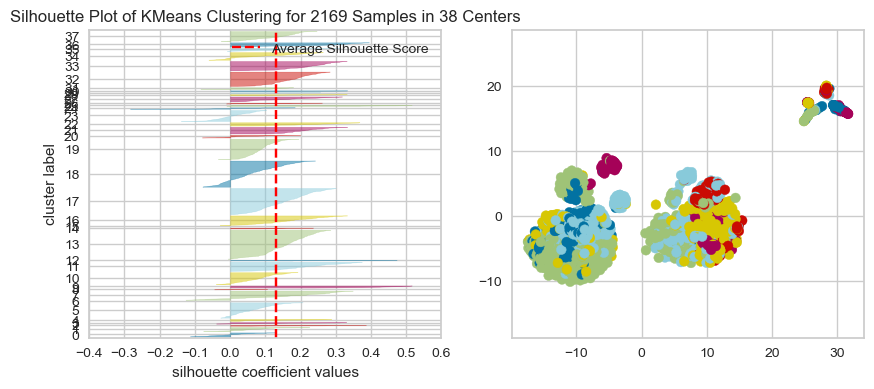

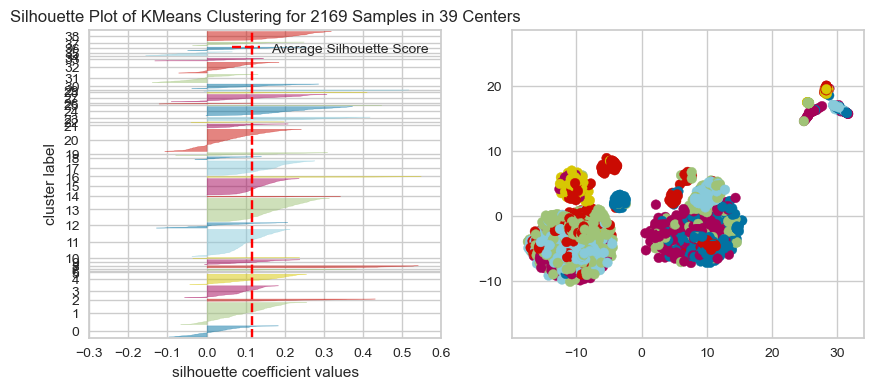

In [32]:
visualizers = [SilhouetteVisualizer(all_kmeans[i], colors='yellowbrick',is_fitted=True) for i in range(0,max_clusters - 2)]
for i in range(max_clusters - 2):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
    visualizer = SilhouetteVisualizer(all_kmeans[i], colors='yellowbrick',is_fitted=True,ax=ax1)
    visualizer.fit(X)
    
    colors = np.array(resolve_colors(i+4,"yellowbrick"))
    ax2.scatter(cells_tsne_embedding[:,0],cells_tsne_embedding[:,1],c=colors[all_kmeans[i].labels_])
    ax2.axis("equal")
    
    # If we want to set axes to be the same for all plots, need to do something like this
    # instead of visualizer.show(), which resets the axes
    visualizer.finalize()
    #ax1.set_xlim((-.4,.8))
    plt.show()

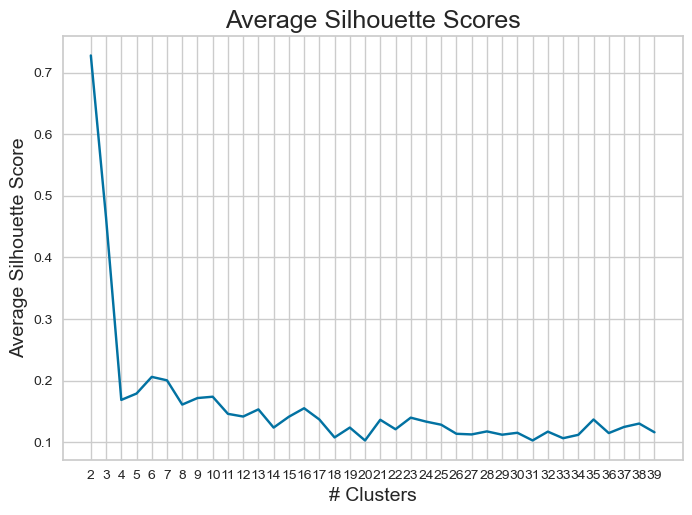

In [33]:
avg_silhouette_scores = [silhouette_score(X,all_kmeans[i].labels_) for i in range(0,max_clusters - 2)]
plt.plot(np.arange(2,max_clusters),avg_silhouette_scores)
plt.xticks(k_clusters)
plt.title("Average Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.show()

In [34]:
all_kmeans[5].fit(X)

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=7, n_init='auto')

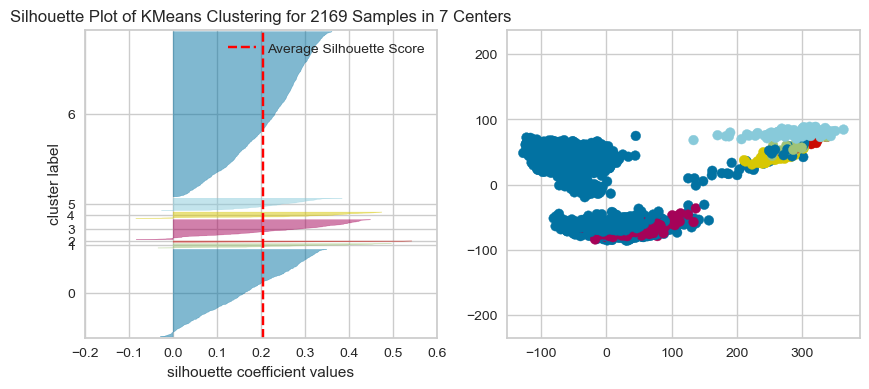

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
visualizer = SilhouetteVisualizer(all_kmeans[5], colors='yellowbrick',is_fitted=True,ax=ax1)
visualizer.fit(X)

colors = np.array(resolve_colors(18+2,"yellowbrick"))
ax2.scatter(X_pca[:,0],X_pca[:,1],c=colors[all_kmeans[5].labels_])
ax2.axis("equal")

# If we want to set axes to be the same for all plots, need to do something like this
# instead of visualizer.show(), which resets the axes
visualizer.finalize()
#ax1.set_xlim((-.4,.8))

plt.show()

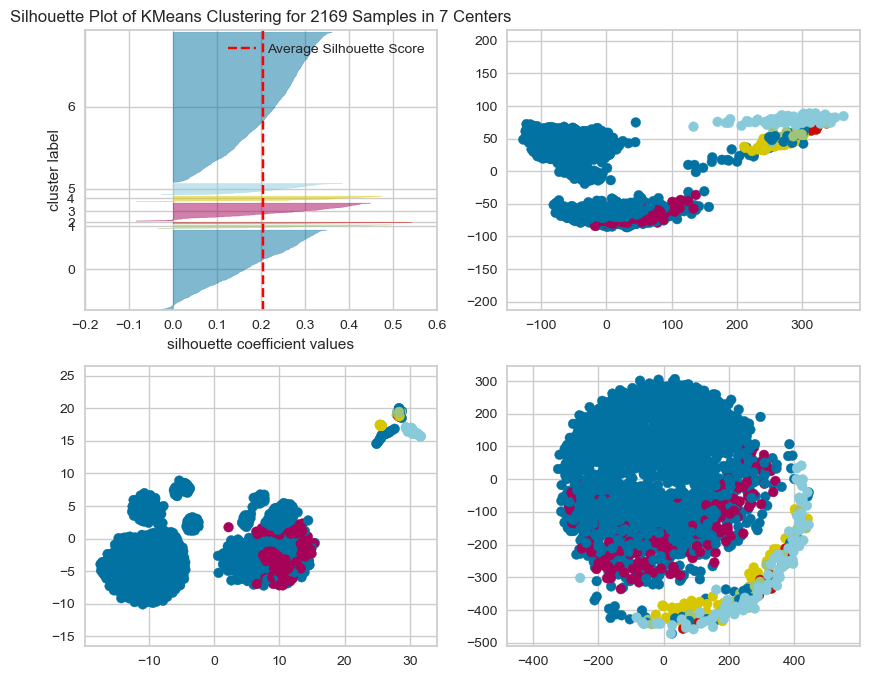

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))
visualizer = SilhouetteVisualizer(all_kmeans[5], colors='yellowbrick',is_fitted=True,ax=ax1)
visualizer.fit(X)

colors = np.array(resolve_colors(18+2,"yellowbrick"))
ax2.scatter(X_pca[:,0],X_pca[:,1],c=colors[all_kmeans[5].labels_])
ax2.axis("equal")

ax3.scatter(cells_tsne_embedding[:,0],cells_tsne_embedding[:,1],c=colors[all_kmeans[5].labels_])
ax3.axis("equal")

ax4.scatter(cells_mds_embedding[:,0],cells_mds_embedding[:,1],c=colors[all_kmeans[5].labels_])
ax4.axis("equal")
# If we want to set axes to be the same for all plots, need to do something like this
# instead of visualizer.show(), which resets the axes
visualizer.finalize()
#ax1.set_xlim((-.4,.8))

plt.show()

In [37]:
all_kmeans[10]

KMeans(n_clusters=12, n_init='auto')

In [39]:
y = all_kmeans[5].predict(X)
y.shape

(2169,)

sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [168]:
X_train.shape

(1626, 45768)

In [45]:
reg = LogisticRegression(multi_class="ovr",penalty = 'l1', solver = "liblinear").fit(X_train, y_train)
reg.score(X_train,y_train)

1.0

In [46]:
reg.score(X_test,y_test)

0.9005524861878453

class sklearn.linear_model.LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='deprecated', random_state=None, l1_ratios=None)

In [ ]:
parameters = {'penalty':['l1', 'l2'], 'solver':['liblinear', 'lbfgs'],'C':[0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 0.95]}
reg_clf = LogisticRegression()
clf = GridSearchCV(reg_clf, parameters)
clf.fit(X_transformed, y)

In [ ]:
clf.cv_results_

In [ ]:
reg_best = clf.best_estimator_
reg_best.get_params()

In [ ]:
reg_elastic = LogisticRegression(multi_class="ovr",penalty = 'elasticnet', solver = 'saga',max_iter=5000,
                         l1_ratio=0.2, C=0.001).fit(X_train, y_train)
reg_elastic.score(X_valid,y_valid)

In [169]:
reg_cv = LogisticRegressionCV(cv = 5, Cs=10, penalty='l2', 
                              solver='liblinear',max_iter=5000).fit(X_train, y_train)
reg_cv.score(X_test,y_test)

0.9152854511970534

In [170]:
reg_cv.score(X_train, y_train)

1.0

In [171]:
reg_cv.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [172]:
reg_cv.Cs_ == 3.59381366e-01

array([False, False, False, False, False, False, False, False, False,
       False])

In [173]:
reg_cv.C_

array([3.59381366e-01, 2.78255940e+00, 1.00000000e-04, 2.78255940e+00,
       1.00000000e-04, 1.00000000e-04, 4.64158883e-02])

In [174]:
np.where(rounded_Cs == rounded_C[2])

(array([3], dtype=int64),)

In [175]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [176]:
rounded_Cs = np.round(reg_cv.Cs_, decimals=5)
rounded_C = np.round(reg_cv.C_, decimals=5)
avg_validation_score_per_class = np.zeros(7)
for i in range(0,7):
    avg_validation_score_per_class[i] = np.mean(reg_cv.scores_[i][:,np.where(rounded_Cs == rounded_C[i])])
avg_validation_score_per_class

array([0.90035677, 0.98769986, 0.99446343, 0.98278433, 0.99753846,
       1.        , 0.88806041])

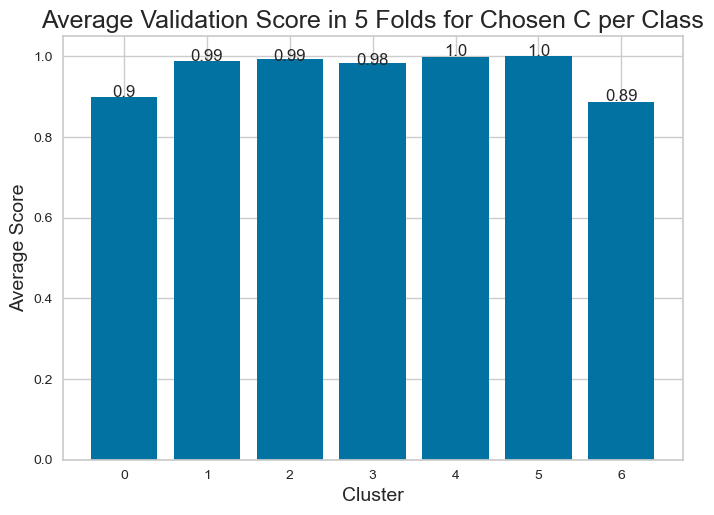

In [177]:
plt.bar(np.arange(0,7),avg_validation_score_per_class)
for i in range(7):
    plt.text(i, np.round(avg_validation_score_per_class[i],2), np.round(avg_validation_score_per_class[i],2), ha = 'center')
plt.title("Average Validation Score in 5 Folds for Chosen C per Class",size=18)
plt.xlabel("Cluster",size=14)
plt.ylabel("Average Score",size=14)
plt.show()

In [178]:
reg_cv.coef_.shape

(7, 45768)

In [182]:
reg_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0}

In [183]:
reg_cv.coef_.shape

(7, 45768)

In [184]:
coefs_abs = np.abs(np.sum(reg_cv.coef_,axis = 0))
coefs_abs.shape

(45768,)

In [185]:
np.argmax(coefs_abs)

40786

In [186]:
data_p2_evaluation_path_X_train = "data/p2_evaluation/X_train.npy"
data_p2_evaluation_path_X_test = "data/p2_evaluation/X_test.npy"
data_p2_evaluation_path_y_train = "data/p2_evaluation/y_train.npy"
data_p2_evaluation_path_y_test = "data/p2_evaluation/y_test.npy"

X_train = np.load(data_p2_evaluation_path_X_train)
X_test = np.load(data_p2_evaluation_path_X_test)
y_train = np.load(data_p2_evaluation_path_y_train)
y_test = np.load(data_p2_evaluation_path_y_test)

X_train_transformed = np.log2(X_train+1)
X_test_transformed = np.log2(X_test+1)

In [187]:
X_train_transformed.shape

(1077, 45768)

In [190]:
X_train_transformed[:,coefs_abs.argsort()[-100:][::-1]].shape

(1077, 100)

In [191]:
reg_cv.coef_.shape

(7, 45768)

In [192]:
reg_cv.coef_[:,coefs_abs.argsort()[-100:][::-1]]

array([[-2.14371652e-02, -6.59052709e-03, -3.33796861e-03,
        -1.32432247e-02, -5.18145076e-03, -9.46521301e-03,
        -5.53756412e-04, -1.36204427e-02, -4.12604134e-03,
        -9.13986811e-03, -4.18915439e-03, -6.90626299e-03,
        -5.57910941e-03, -6.99641686e-03, -1.05065682e-02,
        -5.69103286e-03, -1.75974242e-02, -1.09748672e-02,
        -2.50618696e-02, -8.16672853e-03, -7.00145618e-03,
        -8.43104805e-03, -6.81037396e-03, -1.20172418e-02,
         1.94742882e-02, -8.63623273e-03, -6.50151530e-03,
        -2.66353044e-03, -1.40201950e-02,  2.06023320e-02,
        -6.17705936e-03, -1.92946465e-02, -1.29444770e-02,
        -9.62446473e-03, -1.22091717e-03, -6.05822040e-03,
        -5.19926578e-03,  2.88684359e-04, -4.91265827e-03,
        -9.75909360e-03, -1.79760015e-02, -5.46112293e-03,
        -1.53833797e-02, -8.70944577e-03, -1.91179280e-03,
        -1.55184073e-03, -1.01188242e-02, -2.21634179e-02,
        -1.19337608e-02, -5.54810015e-03, -5.72476812e-0

In [193]:
coeffs_100 = reg_cv.coef_[:,coefs_abs.argsort()[-100:][::-1]]
coeffs_100.shape

(7, 100)

In [203]:
reg_cv = LogisticRegressionCV(cv=5, Cs=10, penalty='l2', max_iter=5000,
                              solver='liblinear').fit(X_train[:,coefs_abs.argsort()[-100:]], y_train)

In [204]:
reg_cv.score(X_test[:,coefs_abs.argsort()[-100:]], y_test)

0.7481949458483754

In [197]:
coeffs_rand = np.random.randint(low = 0, high=X.shape[1], size=100)

In [198]:
reg_cv = LogisticRegressionCV(cv=5,Cs=10, penalty='l2',max_iter=5000,
                              solver='liblinear').fit(X_train[:,coeffs_rand], y_train)

In [199]:
reg_cv.score(X_test[:,coeffs_rand], y_test)

0.3447653429602888

In [200]:
var = np.var(X,axis = 0)

In [201]:
reg_cv = LogisticRegressionCV(cv=5,Cs=10, penalty='l2', max_iter=5000,
                              solver='liblinear').fit(X_train[:,var.argsort()[-100:]], y_train)

In [202]:
reg_cv.score(X_test[:,var.argsort()[-100:]], y_test)

0.8907942238267148

In [214]:
np.var(X_train[:,var.argsort()[-100:]],axis = 0)

array([5.45819793e+05, 5.40126151e+05, 5.52292462e+05, 4.70800928e+05,
       6.84968923e+05, 4.62420853e+05, 5.95971737e+05, 5.91774044e+05,
       7.91614792e+05, 6.74808100e+05, 5.66754345e+05, 6.87408994e+05,
       6.89519523e+05, 2.52472685e+06, 1.39441908e+06, 6.83969260e+05,
       7.36231015e+05, 9.87285673e+05, 6.21264088e+05, 7.35620583e+05,
       8.96881199e+05, 6.99792621e+05, 7.91614249e+05, 4.65570995e+05,
       8.35316048e+05, 8.42843269e+05, 8.07239451e+05, 7.13743061e+05,
       7.94495834e+05, 8.35144651e+05, 8.27728360e+05, 8.03982477e+05,
       6.81326516e+05, 7.70140557e+05, 9.78609981e+05, 7.64029413e+05,
       5.61835575e+05, 9.58168497e+05, 5.93171220e+05, 9.68261811e+05,
       6.25084583e+05, 1.00554137e+06, 8.76353687e+05, 1.04992809e+06,
       1.97656705e+06, 1.03811600e+06, 9.69498861e+05, 1.31143922e+06,
       1.22715693e+06, 1.07375054e+06, 3.52235478e+06, 1.96954055e+06,
       1.42614186e+06, 1.49574339e+06, 1.28369227e+06, 2.12014417e+06,
      

In [215]:
np.var(X_train[:,coefs_abs.argsort()[-100:]], axis = 0)

array([5.77555318e+04, 3.54378015e+05, 6.36431021e+04, 2.80872523e+05,
       3.10961272e+05, 1.29463246e+05, 2.89066689e+05, 2.33130612e+05,
       1.02854747e+05, 1.32847277e+04, 5.73360020e+04, 1.48672839e+05,
       2.61472919e+05, 3.28979758e+04, 2.84752324e+03, 4.36018452e+06,
       1.07533591e+04, 8.83508028e+04, 1.63138493e+05, 2.91565613e+04,
       1.99646486e+04, 1.80869966e+05, 7.88415872e+03, 2.86127858e+05,
       3.37119001e+04, 2.22310649e+04, 8.35316048e+05, 4.30786211e+05,
       3.26611875e+05, 1.43735468e+05, 1.12982603e+03, 6.53852657e+04,
       1.01222481e+05, 2.80520426e+04, 2.82884684e+04, 3.85931940e+04,
       1.09150185e+04, 1.90001338e+05, 2.93350369e+05, 5.91172964e+06,
       9.77447484e+04, 2.22136296e+05, 7.70140557e+05, 7.62742913e+04,
       3.53461450e+04, 1.15416296e+05, 2.07738782e+05, 1.03811600e+06,
       1.43512655e+05, 8.96881199e+05, 9.33502573e+04, 4.76384169e+05,
       2.28685133e+03, 8.59477939e+04, 2.12014417e+06, 8.97779082e+04,
      

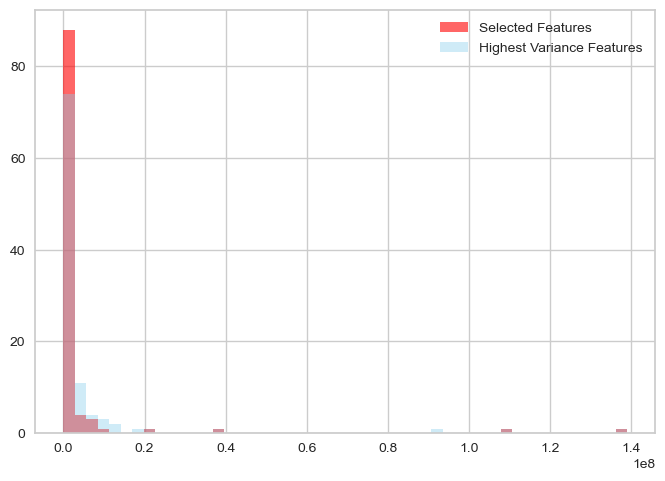

In [231]:
bins = np.linspace(0, np.max(np.var(X_train[:,var.argsort()[-100:]],axis = 0)), 50)

plt.hist(np.var(X_train[:,coefs_abs.argsort()[-100:]], axis = 0), bins, alpha=0.6, label='Selected Features', color = "red")
plt.hist(np.var(X_train[:,var.argsort()[-100:]],axis = 0), bins, alpha=0.4, label='Highest Variance Features',color = "skyblue")
plt.legend(loc='upper right')
plt.show()

plt.show()

## Problem 3

The hyper-parameter choices used in data analysis techniques can have a large impact on the inferences made. As you may have encountered, finding the best choice of parameter such as perplexity in T-SNE or the number of clusters can be an ambiguous problem. We will now investigate the sensitivity of your results to changes in these hyper-parameters, with the goal of understanding how your conclusions may vary depending on these choices.

(3 points) When we created the T-SNE plot in Problem 1, we ran T-SNE on the top 50 PC's of the data. But we could have easily chosen a different number of PC's to represent the data. Run T-SNE using 10, 50, 100, 250, and 500 PC's, and plot the resulting visualization for each. What do you observe as you increase the number of PC's used?

In [53]:
data_p1_path = "data/p1/X.npy"
target_p1_path = "data/p1/y.npy"
X = np.load(data_p1_path)
y = np.load(target_p1_path)

In [54]:
X_transformed = np.log2(X+1)
pca = PCA()
X_transformed_pca = pca.fit_transform(X_transformed)

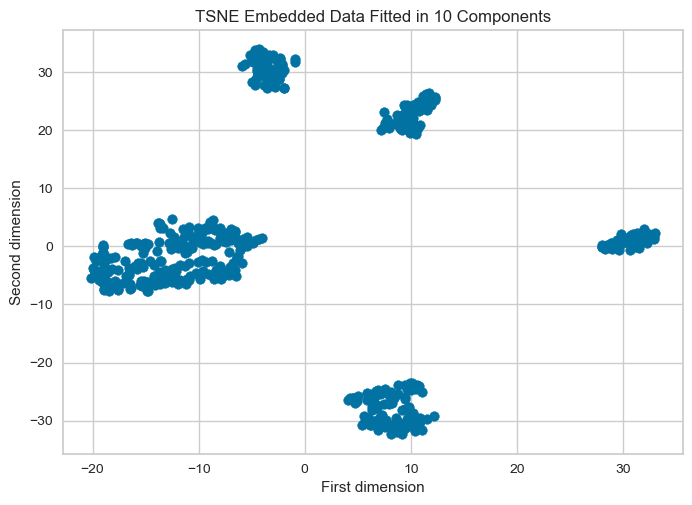

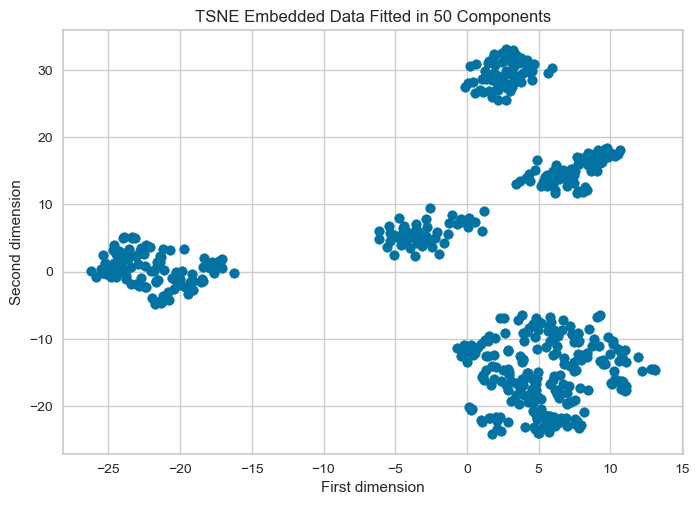

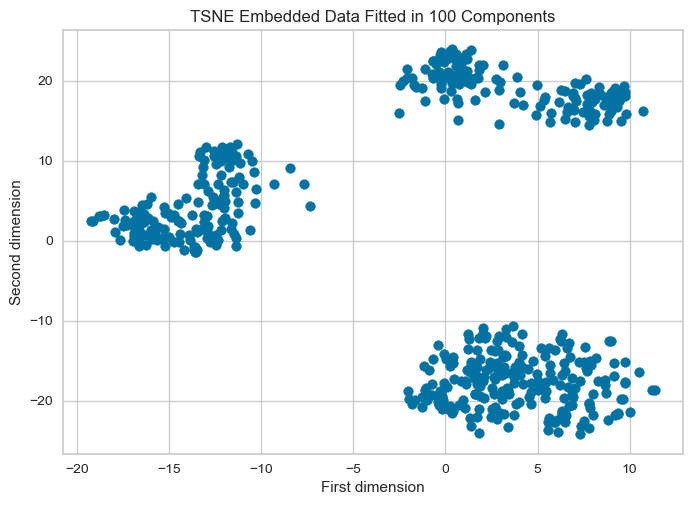

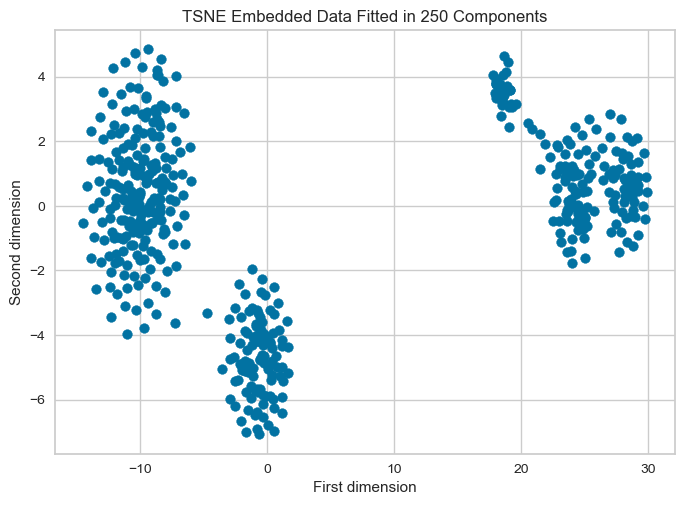

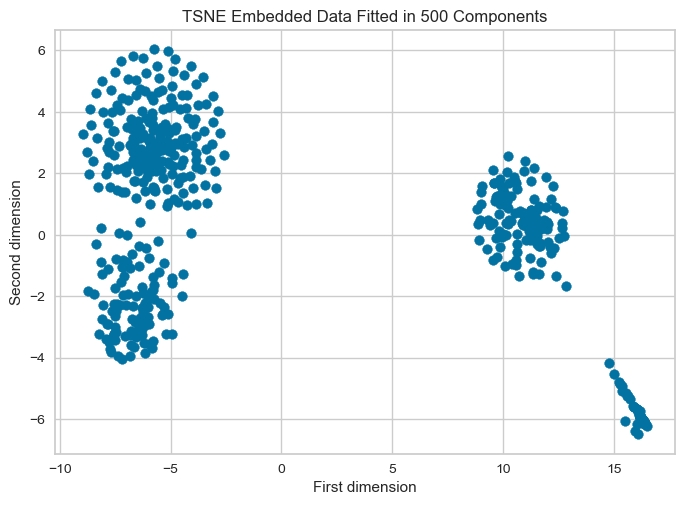

In [55]:
pca_list = [10,50,100,250,500]
for num_pca_components in pca_list:
    top_pca = X_transformed_pca[:,0:num_pca_components]
    tsne = TSNE(perplexity= 40)
    tsne_embedded = tsne.fit_transform(top_pca)
    plt.scatter(tsne_embedded[:,0],tsne_embedded[:,1])
    plt.title(f"TSNE Embedded Data Fitted in {num_pca_components} Components")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.show()

In [56]:
# perplexity
# early_exaggeration
# Effect of number of PC's chosen on clustering

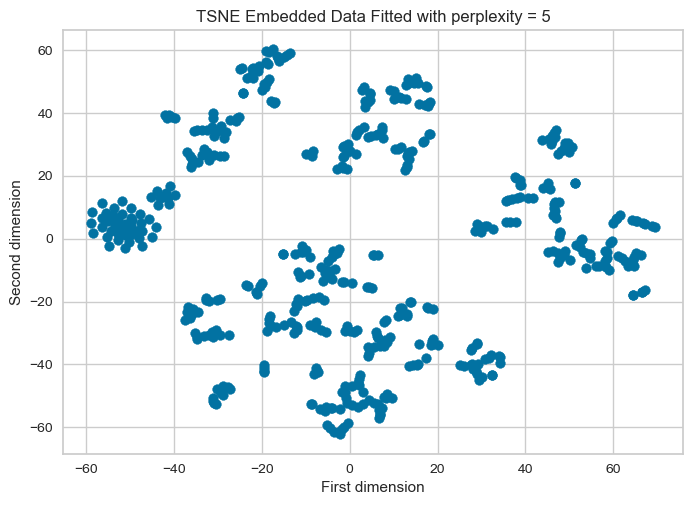

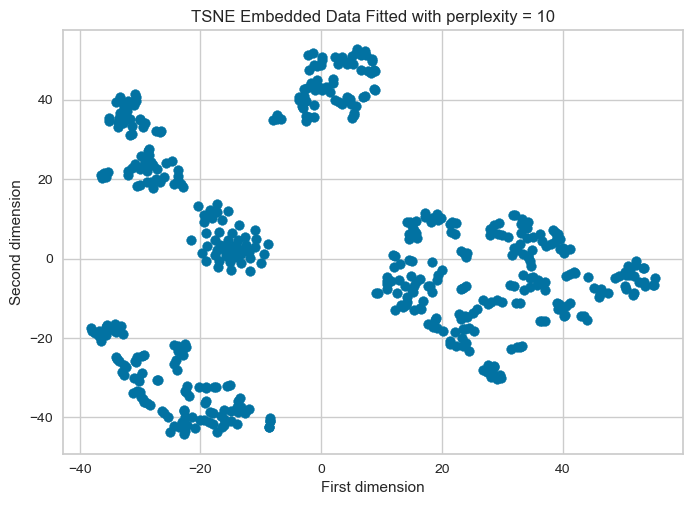

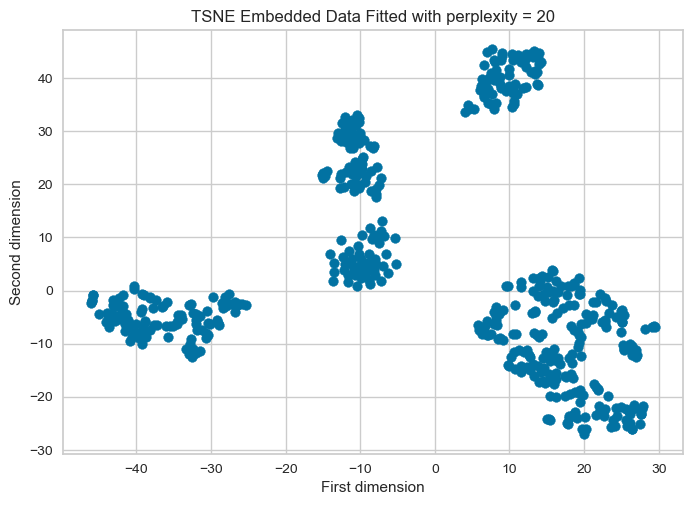

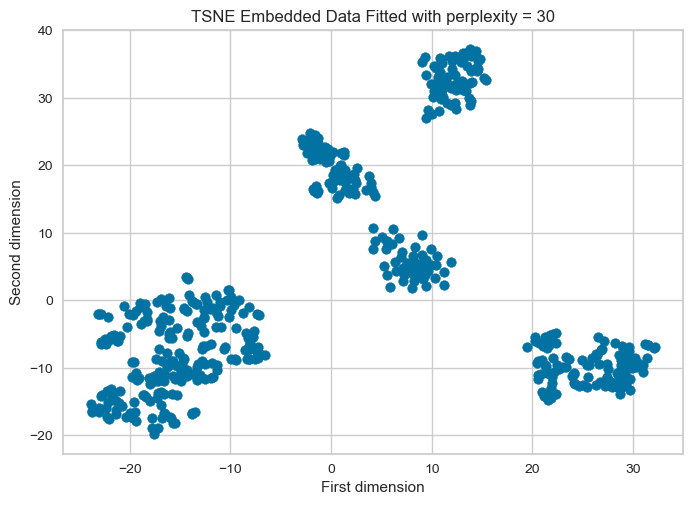

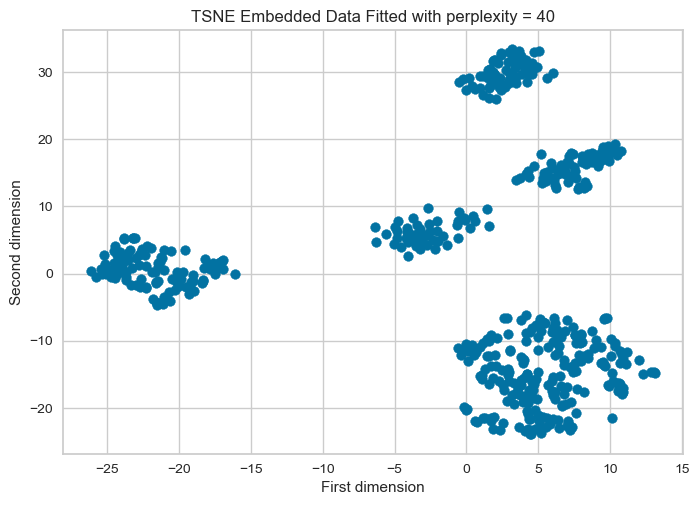

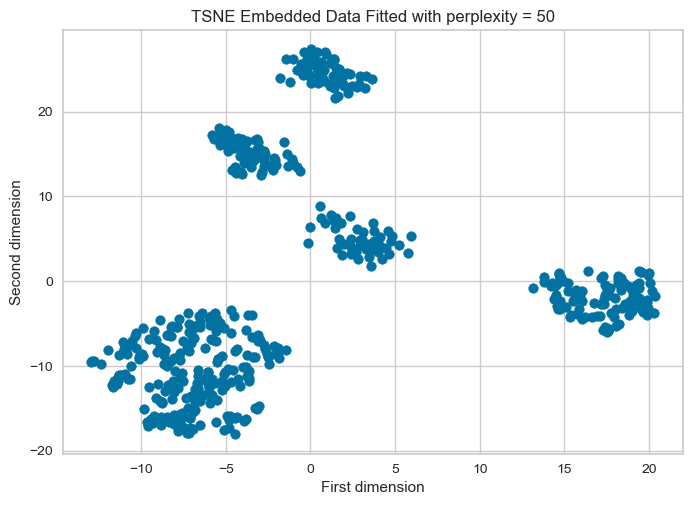

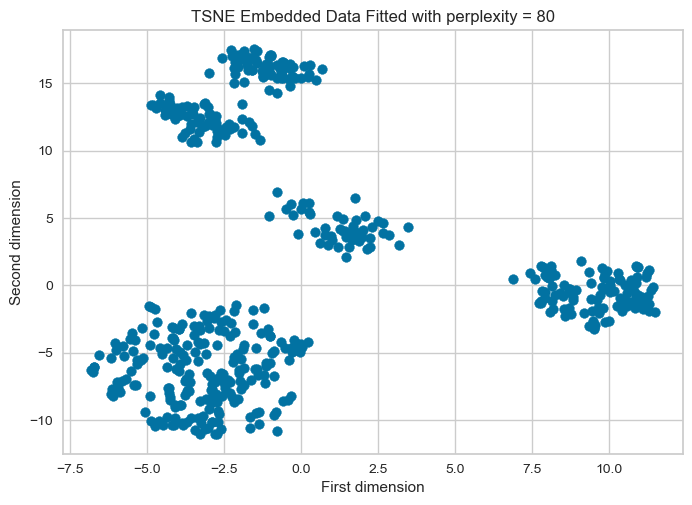

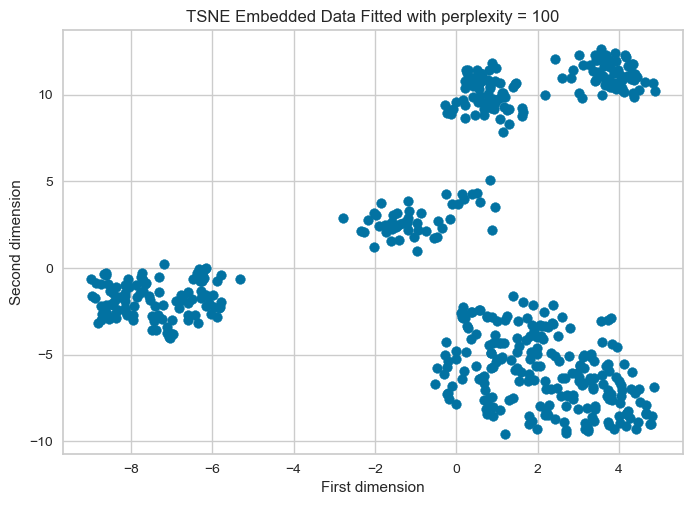

In [57]:
perplexity_list = [5, 10,20,30,40,50,80,100]
top_pca = X_transformed_pca[:,0:50]
for perplexity in perplexity_list:
    tsne = TSNE(perplexity= perplexity)
    tsne_embedded = tsne.fit_transform(top_pca)
    plt.scatter(tsne_embedded[:,0],tsne_embedded[:,1])
    plt.title(f"TSNE Embedded Data Fitted with perplexity = {perplexity}")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.show()

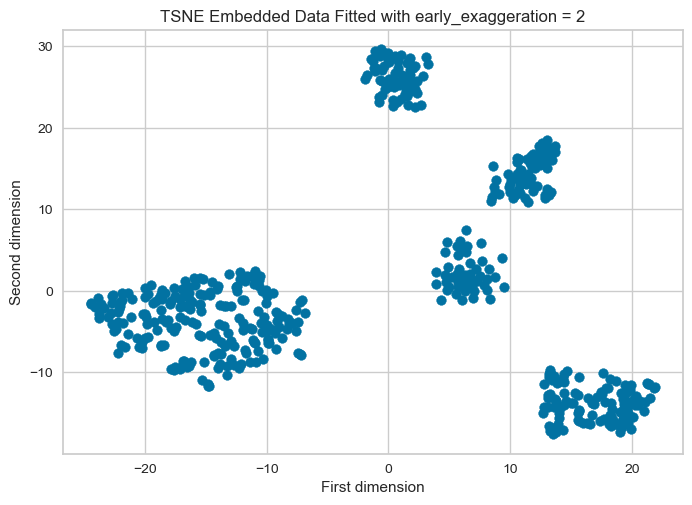

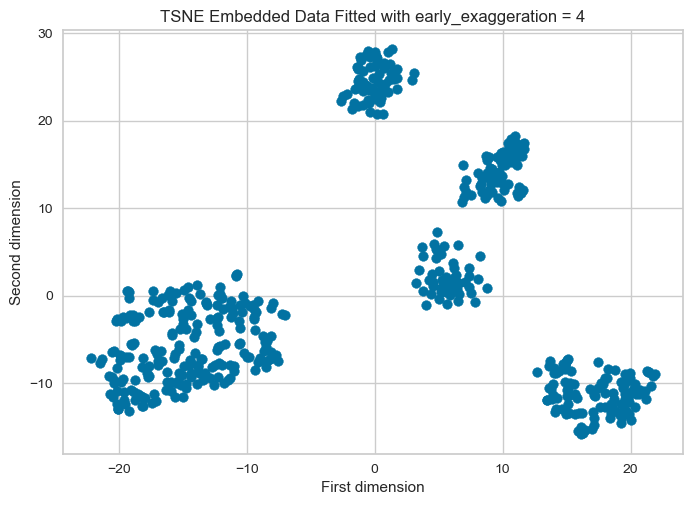

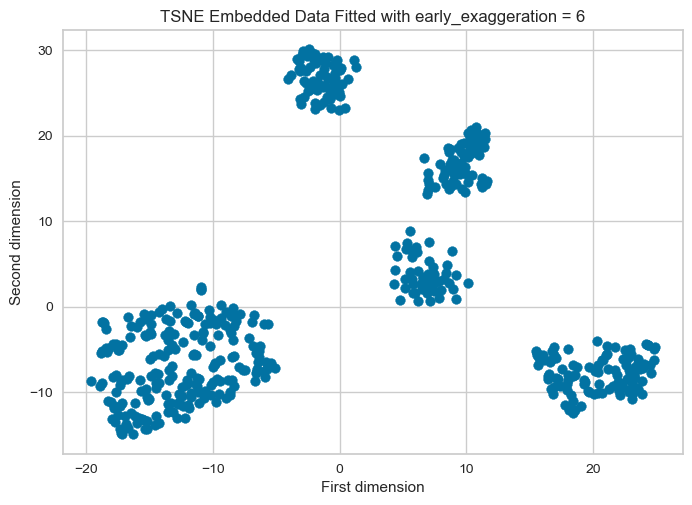

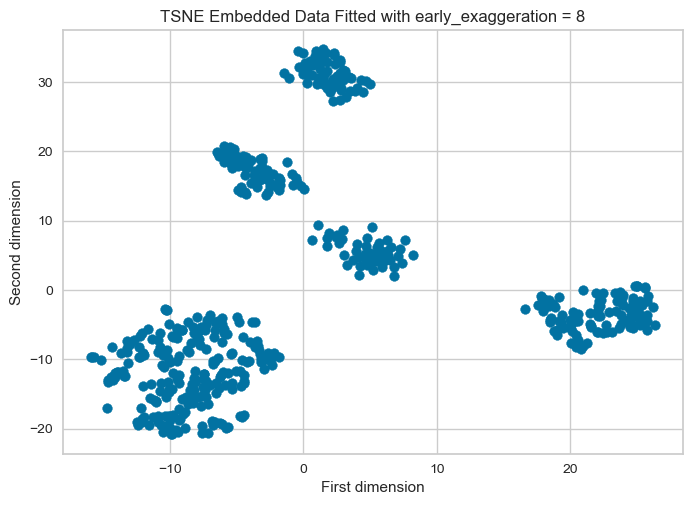

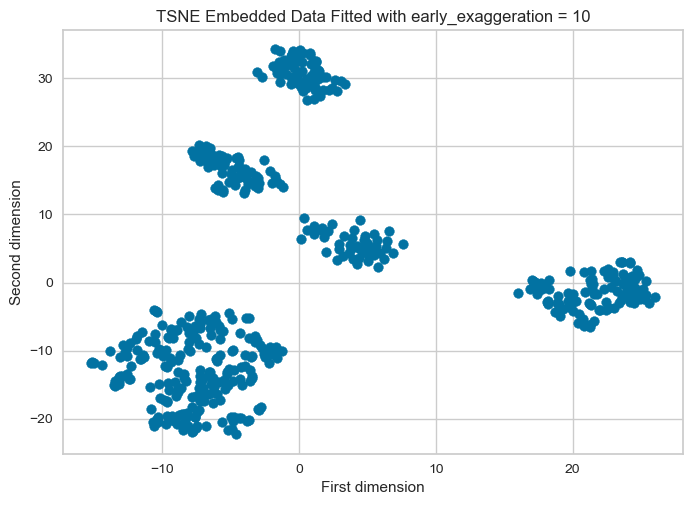

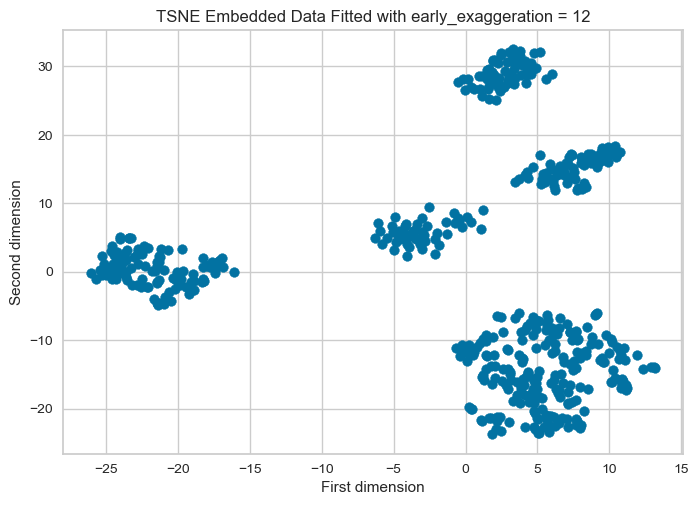

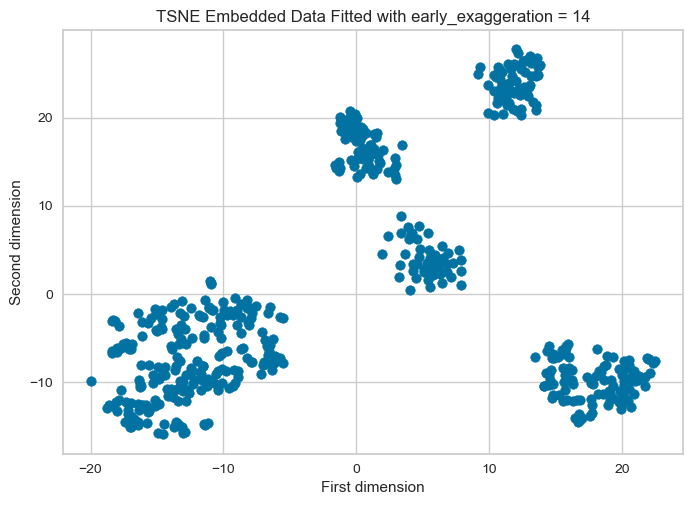

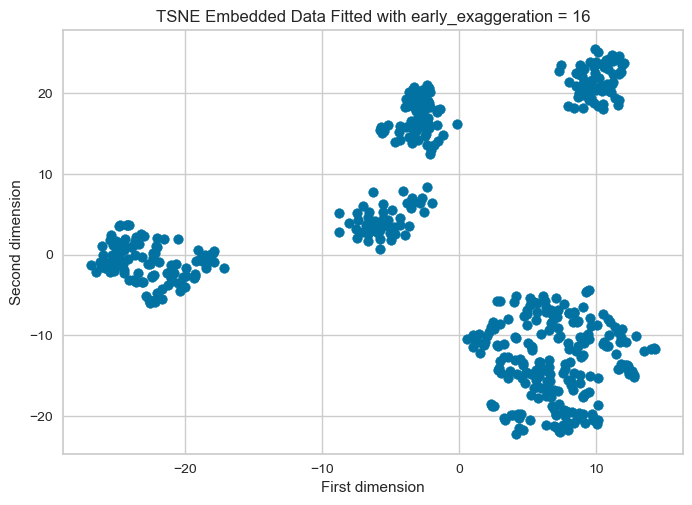

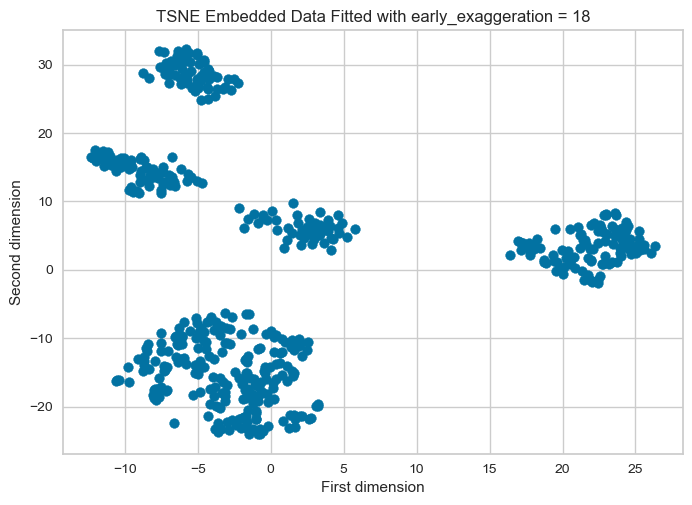

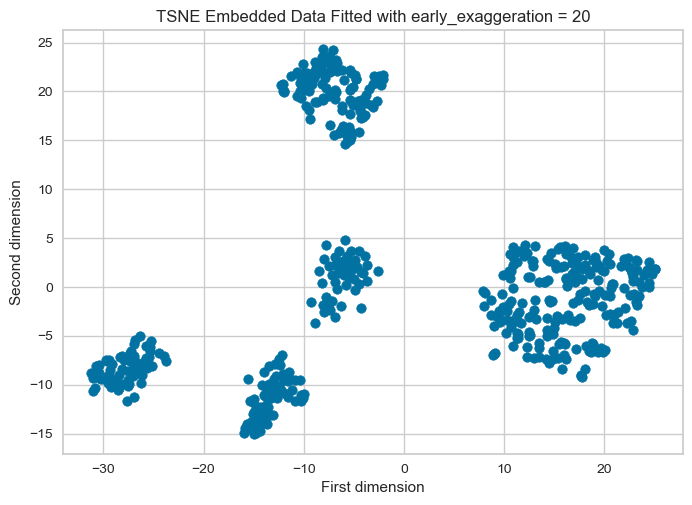

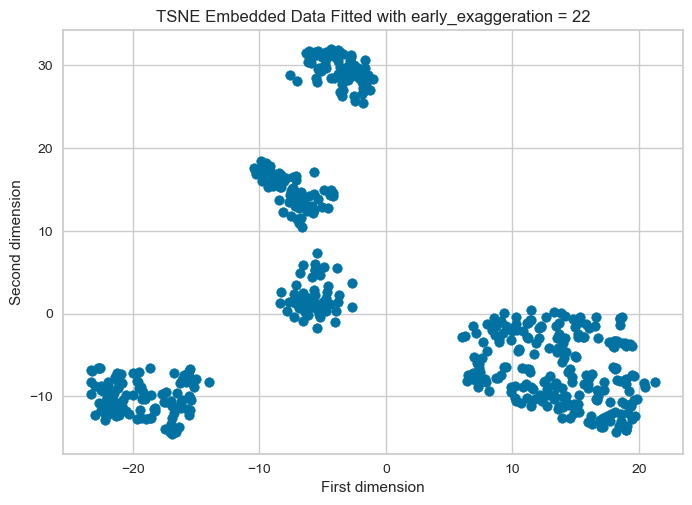

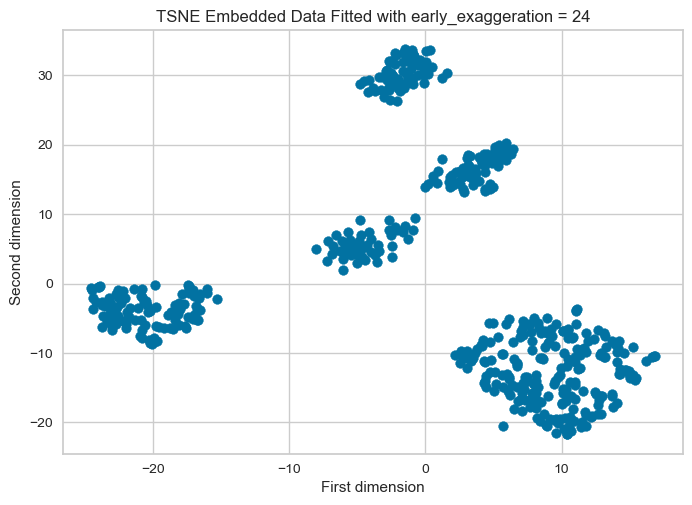

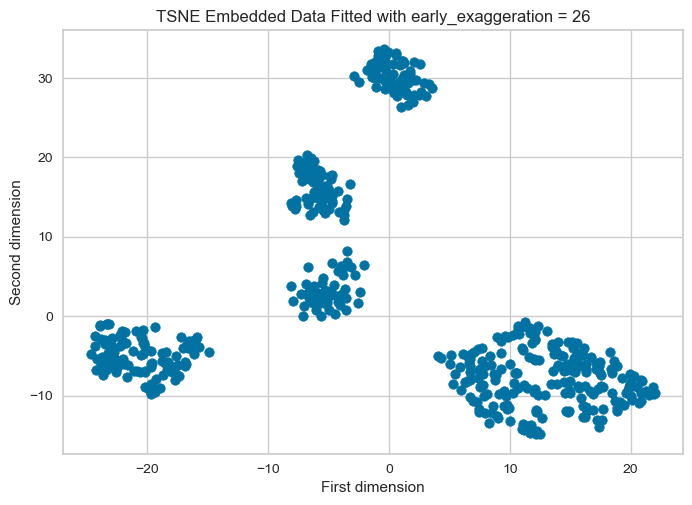

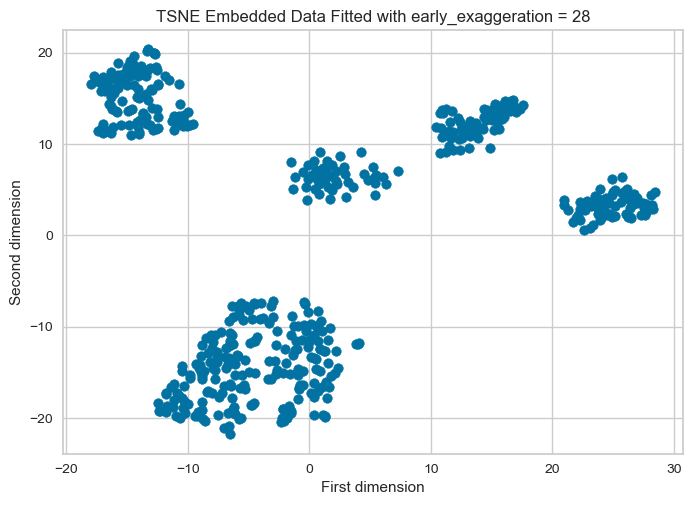

In [58]:
early_exaggeration_list = np.arange(2,30,2)
top_pca = X_transformed_pca[:,0:50]
for early_exaggeration in early_exaggeration_list:
    tsne = TSNE(early_exaggeration = early_exaggeration, perplexity= 40)
    tsne_embedded = tsne.fit_transform(top_pca)
    plt.scatter(tsne_embedded[:,0],tsne_embedded[:,1])
    plt.title(f"TSNE Embedded Data Fitted with early_exaggeration = {early_exaggeration}")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.show()

D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Tools\anaconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

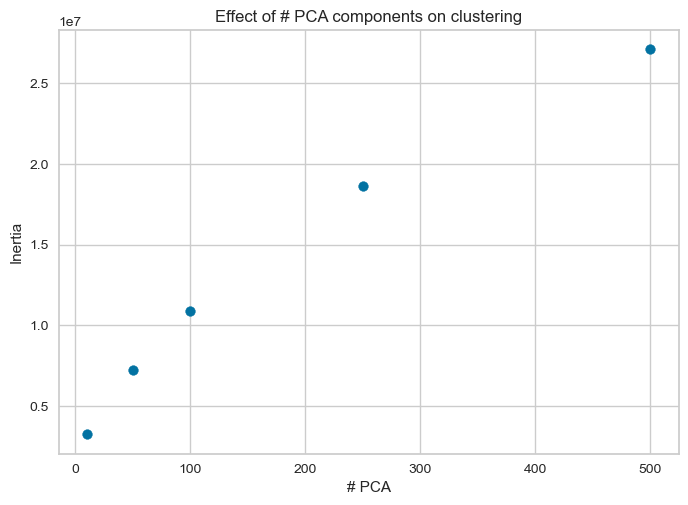

In [59]:
pca_list = [10,50,100,250,500]
inertia_list = []
for num_pca_components in pca_list:
    top_pca = X_transformed_pca[:,0:num_pca_components]
    kmeans = KMeans(n_clusters = 3).fit(top_pca)
    inertia_list.append(kmeans.inertia_)
    
plt.scatter(pca_list,inertia_list)
plt.title(f"Effect of # PCA components on clustering")
plt.xlabel("# PCA")
plt.ylabel("Inertia")
plt.show()